# Problem Statement

## Context

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

## Objective

A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:

Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.ns.

They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.

## Data Dictionary

The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is available in the data dictionary file (*'Comp_Fin_Data.csv'*).

## **1. Problem Definition**
* Businesses need to manage debt effectively to ensure financial stability and maintain a strong credit profile.
* Investors analyze financial statements to assess a company’s capability to fulfill obligations and remain profitable.
* This project focuses on creating a Financial Health Assessment Tool to predict potential company defaults based on past financial data.
* Target Variable: Net Worth Next Year (if negative, the company is classified as a defaulter).
* Objective: Detect critical financial trends that signal a company's risk of default.

## **2. Data Exploration**

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

# Loading the Data

In [2]:
df = pd.read_csv('Comp_Fin_Data.csv')

# Data Overview

In [3]:
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


#### Fixing messy column names (containing spaces) for ease of use

In [4]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

#### Checking top 5 rows again

In [5]:
df.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


#### Checking last 5 rows 

In [6]:
df.tail()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
4251,4252,0.2,0.4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.4,NaN
4252,4253,93.3,159.6,86.7,172.9,0.1,169.7,3.3,18.4,3.7,...,1.80,11.00,8.28,9.88,8162700.0,10.0,0.42,0.42,159.6,16.81
4253,4254,932.2,833.8,664.6,2314.7,32.1,2151.6,195.2,348.4,303.0,...,6.08,59.28,31.14,9.87,7479762.0,10.0,26.58,26.58,833.8,5.69
4254,4255,64.6,95.0,48.5,110.5,4.6,113.5,1.6,9.7,2.6,...,3.71,78.99,11.51,14.95,NaN,NaN,0.00,0.00,95.0,NaN
4255,4256,0.0,384.6,111.3,345.8,11.3,341.7,15.4,57.6,20.7,...,4.71,53.37,8.33,3.74,960000.0,10.0,15.63,15.63,384.6,NaN


In [7]:
df.sample(5)

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
3370,3371,-2.8,7.1,0.5,9.6,-1.3,26.0,-17.7,-13.3,-18.9,...,2.89,19.86,17.65,2.53,2000000.0,10.0,-4.70,-4.70,7.1,NaN
2633,2634,8.0,17.4,6.9,97.9,-1.2,95.6,1.1,1.7,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,17.4,NaN
4121,4122,3746.8,15576.6,2955.0,10115.2,-12.8,9773.4,329.0,1625.0,258.6,...,6.19,27.19,20.79,11.43,105345365.0,5.0,1.93,1.93,15576.6,17.71
4115,4116,1.0,79.0,0.6,0.1,NaN,2.7,-2.6,-2.6,-2.6,...,0.00,2.60,3.71,0.00,NaN,NaN,0.00,0.00,79.0,NaN
3608,3609,0.0,54.2,3.9,17.6,NaN,12.3,5.3,5.9,5.3,...,NaN,NaN,NaN,1.43,250300.0,10.0,21.17,21.17,54.2,NaN


1. Checking the Shape & Structure
* Number of rows and columns
* Data types of each column
* Missing values and their proportion

#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [8]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


#### Checking datatype of all columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [10]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
if not duplicate_rows.empty:
    print(f"Found {len(duplicate_rows)} duplicate rows in the dataset.")
    display(duplicate_rows.head())  # Show first few duplicate rows
else:
    print("No duplicate rows found in the dataset.")


No duplicate rows found in the dataset.


In [11]:
#checking for no. of unique values
# Count unique values in each column
unique_counts = df.nunique()

# Display unique value counts
print("Number of unique values per column:")
print(unique_counts)


Number of unique values per column:
Num                                               4256
Networth_Next_Year                                2574
Total_assets                                      2961
Net_worth                                         2376
Total_income                                      2870
Change_in_stock                                   1164
Total_expenses                                    2898
Profit_after_tax                                  1467
PBDITA                                            1826
PBT                                               1568
Cash_profit                                       1655
PBDITA_as_perc_of_total_income                    2032
PBT_as_perc_of_total_income                       1878
PAT_as_perc_of_total_income                       1692
Cash_profit_as_perc_of_total_income               1867
PAT_as_perc_of_net_worth                          2385
Sales                                             2847
Income_from_fincial_services 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,4256.0,2.128500e+03,1.228746e+03,1.000000e+00,1064.750,2128.500,3.192250e+03,4.256000e+03
Networth_Next_Year,4256.0,1.344741e+03,1.593674e+04,-7.426560e+04,3.975,72.100,3.308250e+02,8.057734e+05
Total_assets,4256.0,3.573617e+03,3.007444e+04,1.000000e-01,91.300,315.500,1.120800e+03,1.176509e+06
Net_worth,4256.0,1.351950e+03,1.296131e+04,0.000000e+00,31.475,104.800,3.898500e+02,6.131516e+05
Total_income,4025.0,4.688190e+03,5.391895e+04,0.000000e+00,107.100,455.100,1.485000e+03,2.442828e+06
Change_in_stock,3706.0,4.370248e+01,4.369150e+02,-3.029400e+03,-1.800,1.600,1.840000e+01,1.418550e+04
Total_expenses,4091.0,4.356301e+03,5.139809e+04,-1.000000e-01,96.800,426.800,1.395700e+03,2.366035e+06
Profit_after_tax,4102.0,2.950506e+02,3.079902e+03,-3.908300e+03,0.500,9.000,5.330000e+01,1.194391e+05
PBDITA,4102.0,6.059406e+02,5.646231e+03,-4.407000e+02,6.925,36.900,1.587000e+02,2.085765e+05
PBT,4102.0,4.102590e+02,4.217415e+03,-3.894800e+03,0.800,12.600,7.417500e+01,1.452926e+05


# Exploratory Data Analysis

## Univariate Analysis

#### Creating a binary target variable using 'Networth_Next_Year' 

In [13]:
df['Default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [14]:
df["Default"].unique()

array([0, 1])

In [15]:
df["Default"].value_counts()

Default
0    3352
1     904
Name: count, dtype: int64

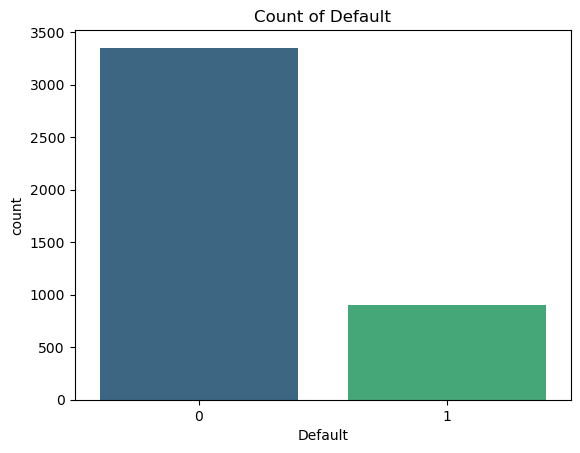

In [16]:
#Plotting a countplot for the target variable
sns.countplot(x="Default", data=df,palette="viridis")  
plt.title('Count of Default')
plt.show()

In [17]:
#Percentage of defaulters
(df.Default.sum()/len(df)) * 100

21.2406015037594

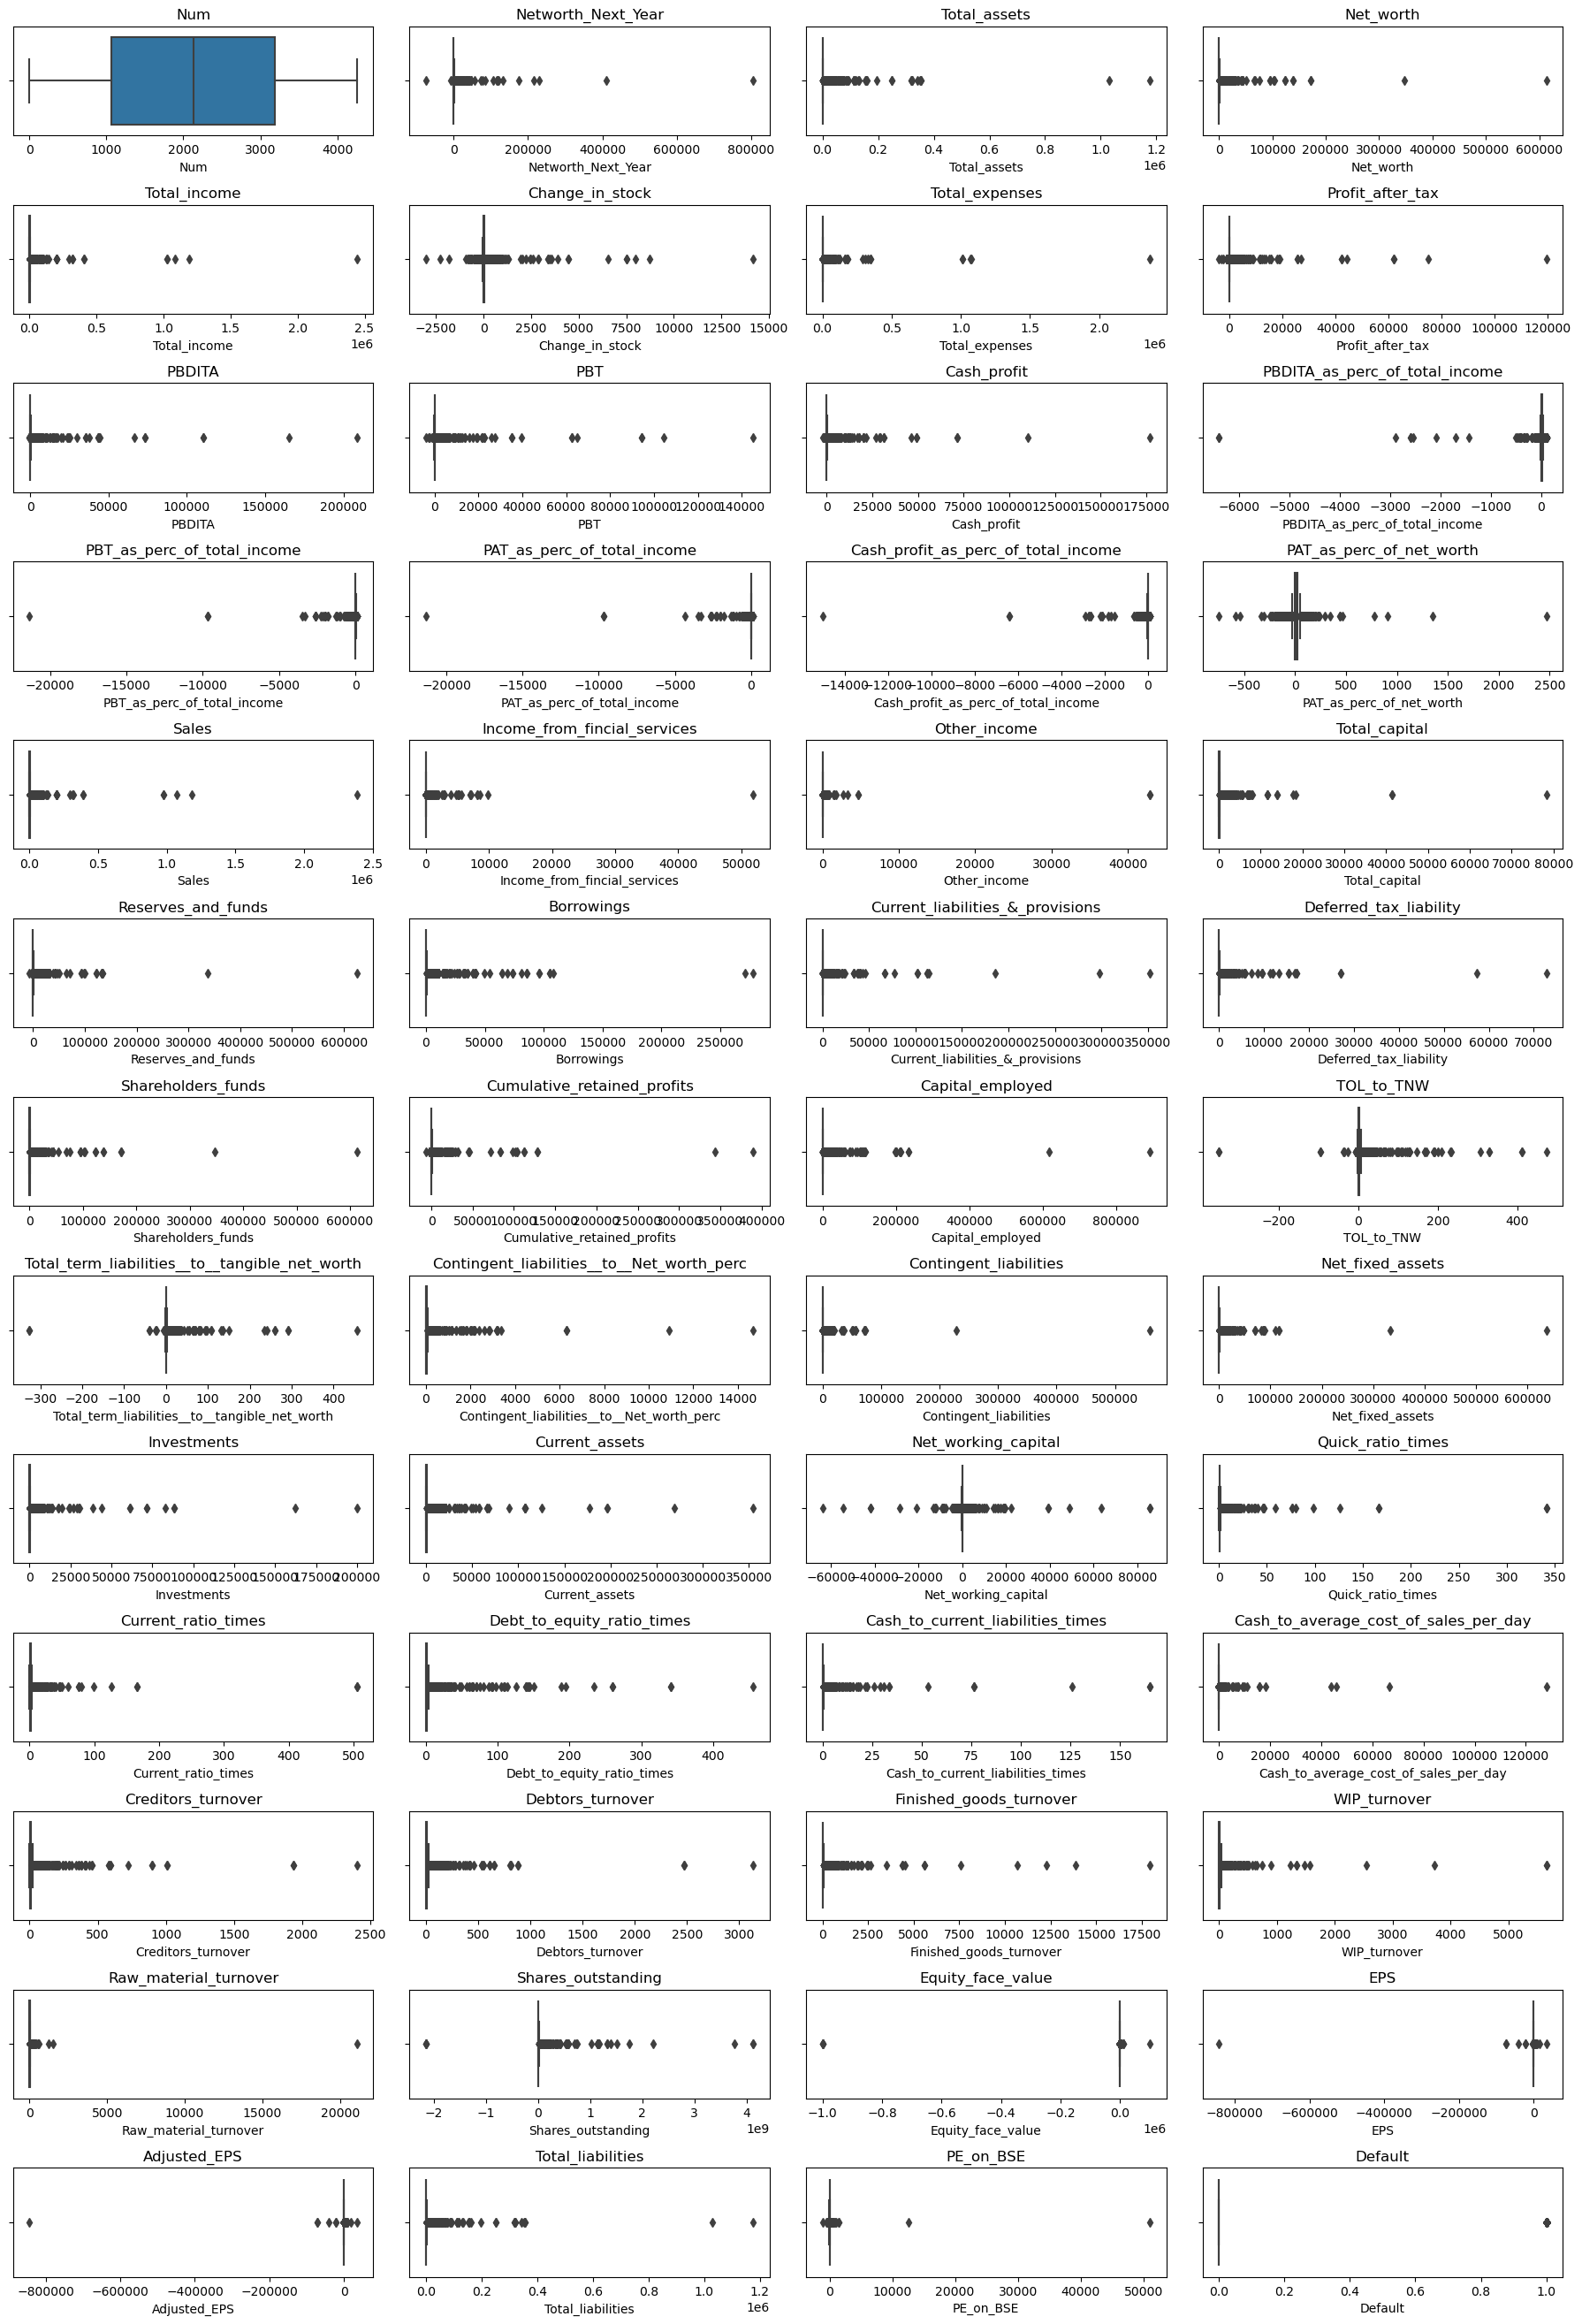

In [18]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=df, x=variable)  ## Creating boxplots for all numerical columns
    plt.tight_layout()
    plt.title(variable)

plt.show()

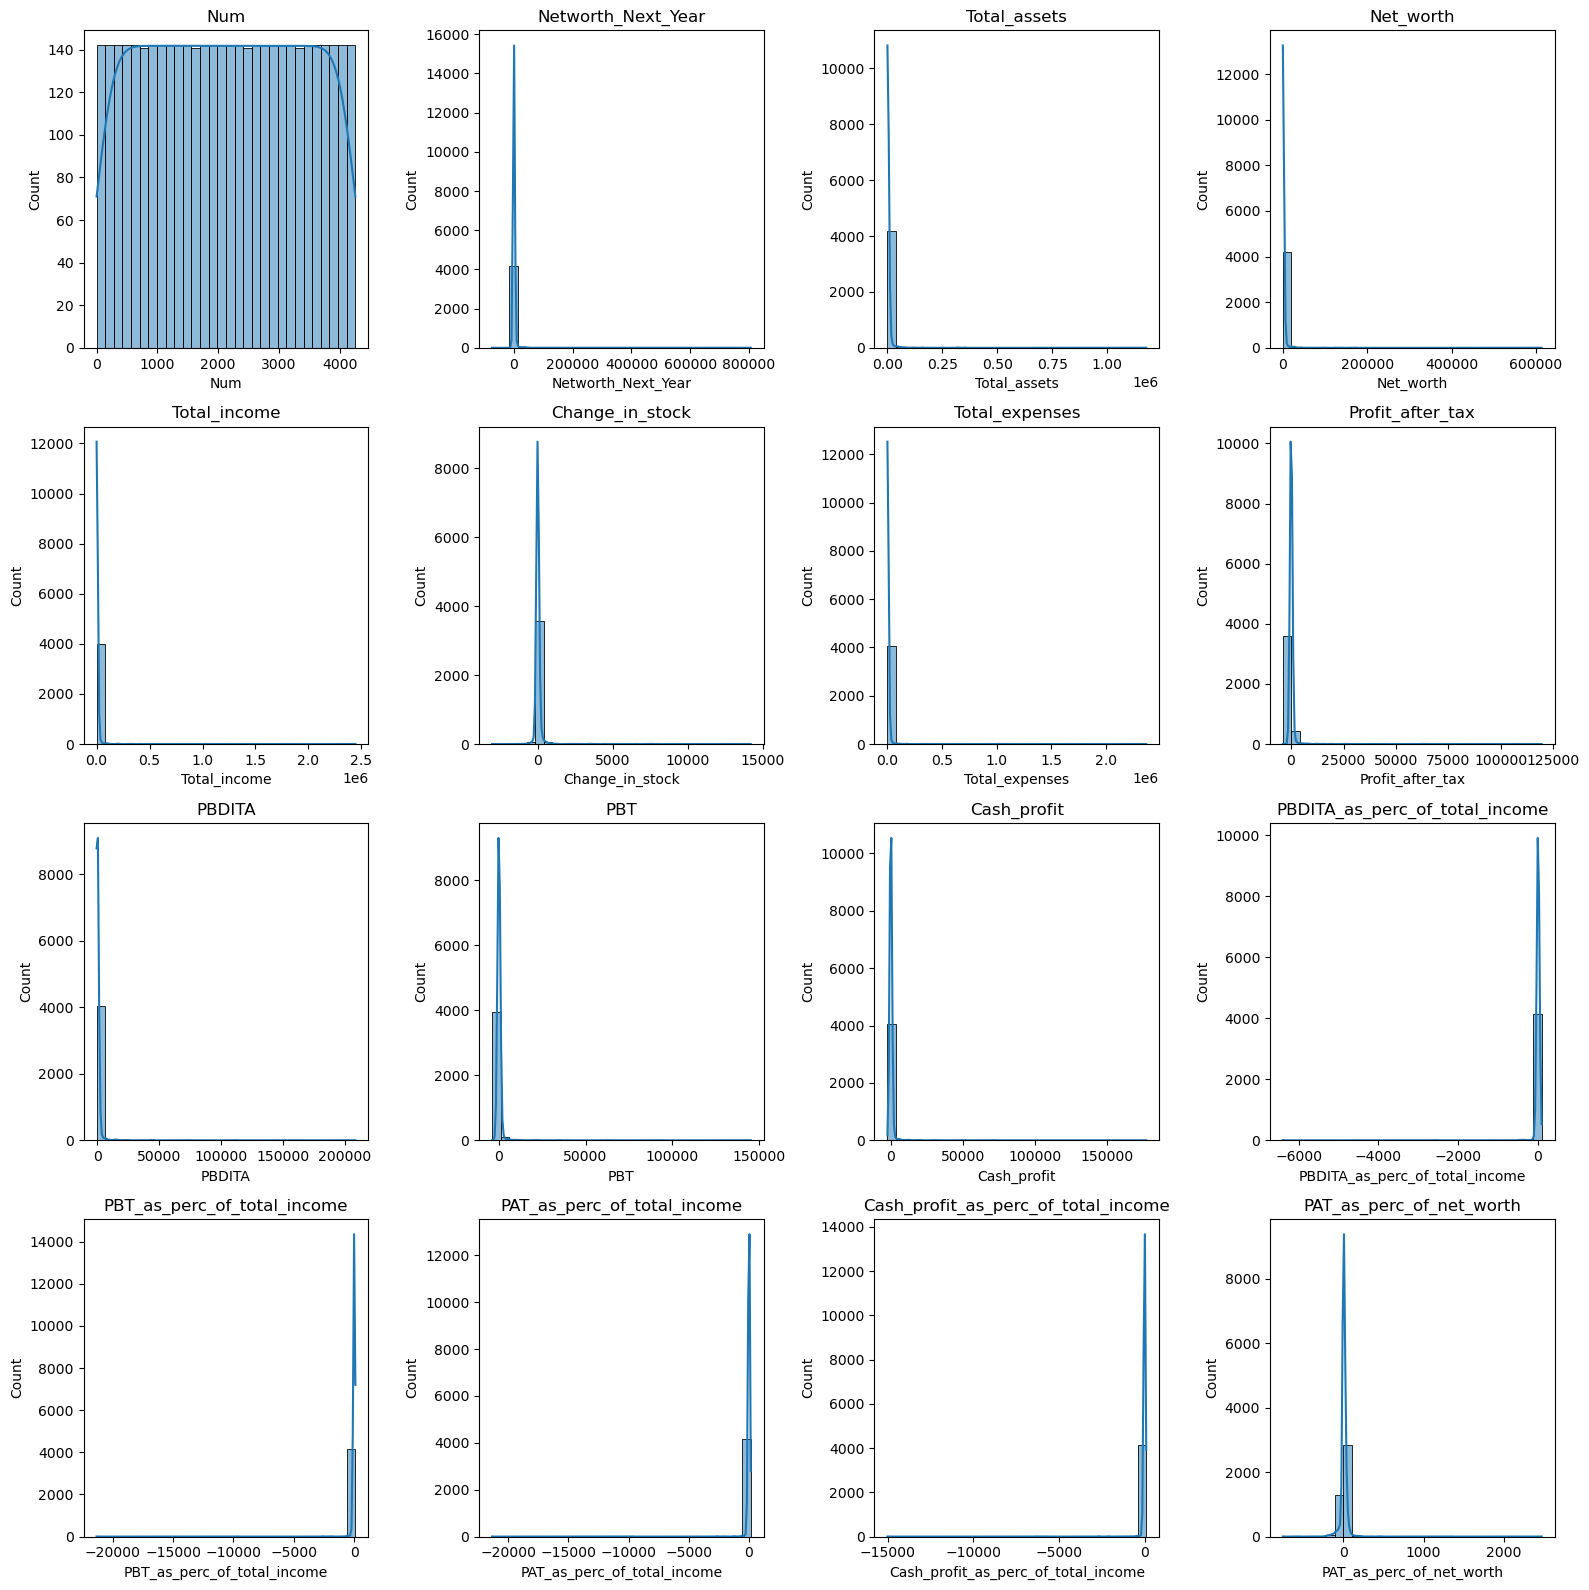

In [19]:
#Get histplots for all the numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

for i, col in enumerate(num_cols[:16]):  # Limit to first 16 numeric columns
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [20]:
# Skewness Check
print("\nSkewness of Features:\n", df.skew())
print("\nKurtosis:\n", df.kurtosis())


Skewness of Features:
 Num                                                0.000000
Networth_Next_Year                                36.375204
Total_assets                                      26.422680
Net_worth                                         31.851686
Total_income                                      31.443117
Change_in_stock                                   18.024259
Total_expenses                                    32.190391
Profit_after_tax                                  24.290606
PBDITA                                            24.124350
PBT                                               22.275883
Cash_profit                                       27.667906
PBDITA_as_perc_of_total_income                   -29.030769
PBT_as_perc_of_total_income                      -37.936981
PAT_as_perc_of_total_income                      -37.170128
Cash_profit_as_perc_of_total_income              -36.017775
PAT_as_perc_of_net_worth                          17.761978
Sales           

Most features are heavily skewed, and many require transformation before modeling.
Raw_material_turnover (60.60) & EPS (-63.28) are the most extreme in terms of skewness.
The "Default" column should be checked for class imbalance.

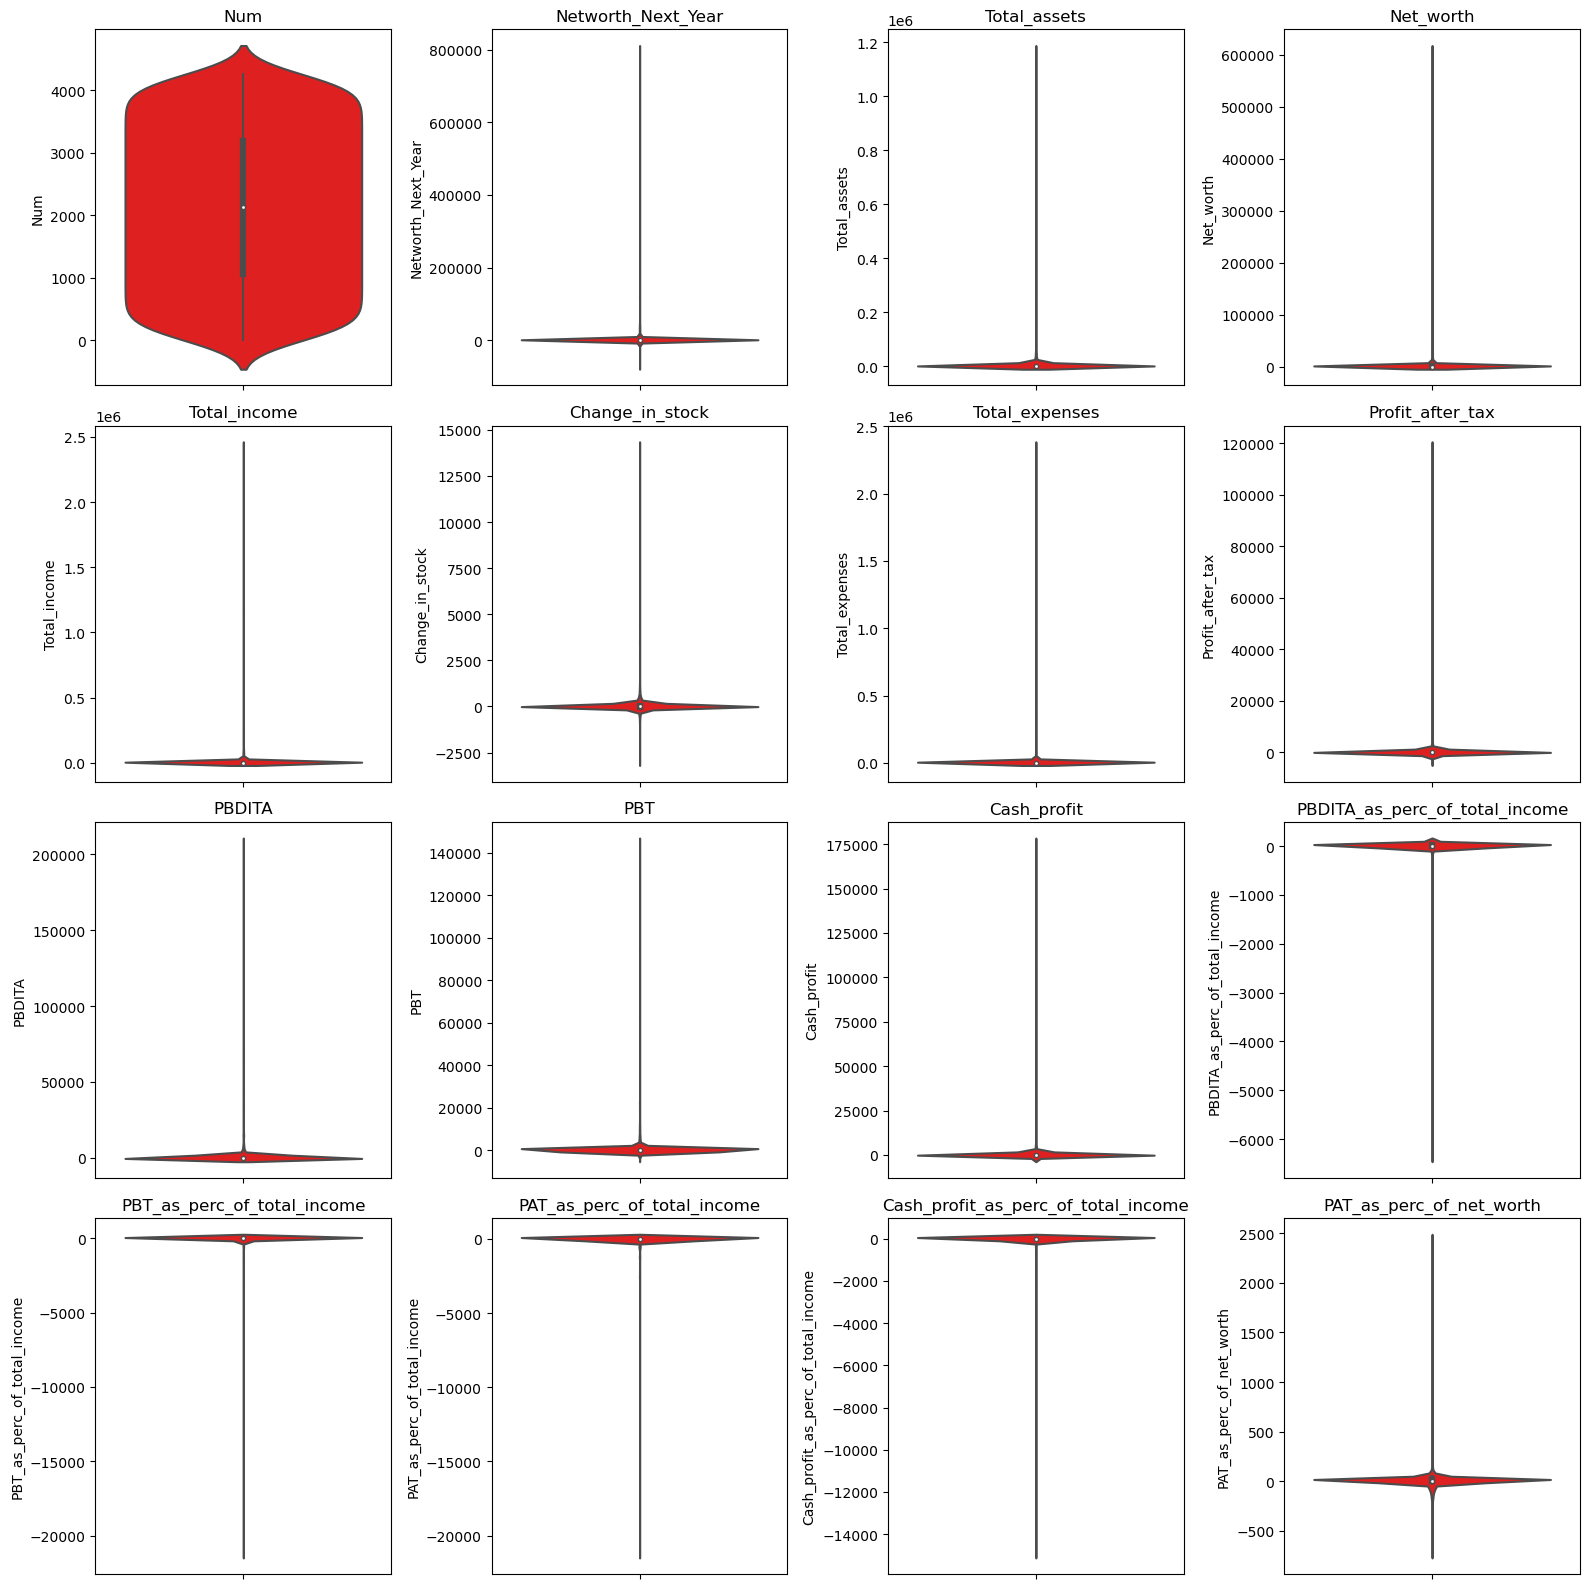

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

for i, col in enumerate(num_cols[:16]):  
    sns.violinplot(y=df[col], ax=axes[i], color="red")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

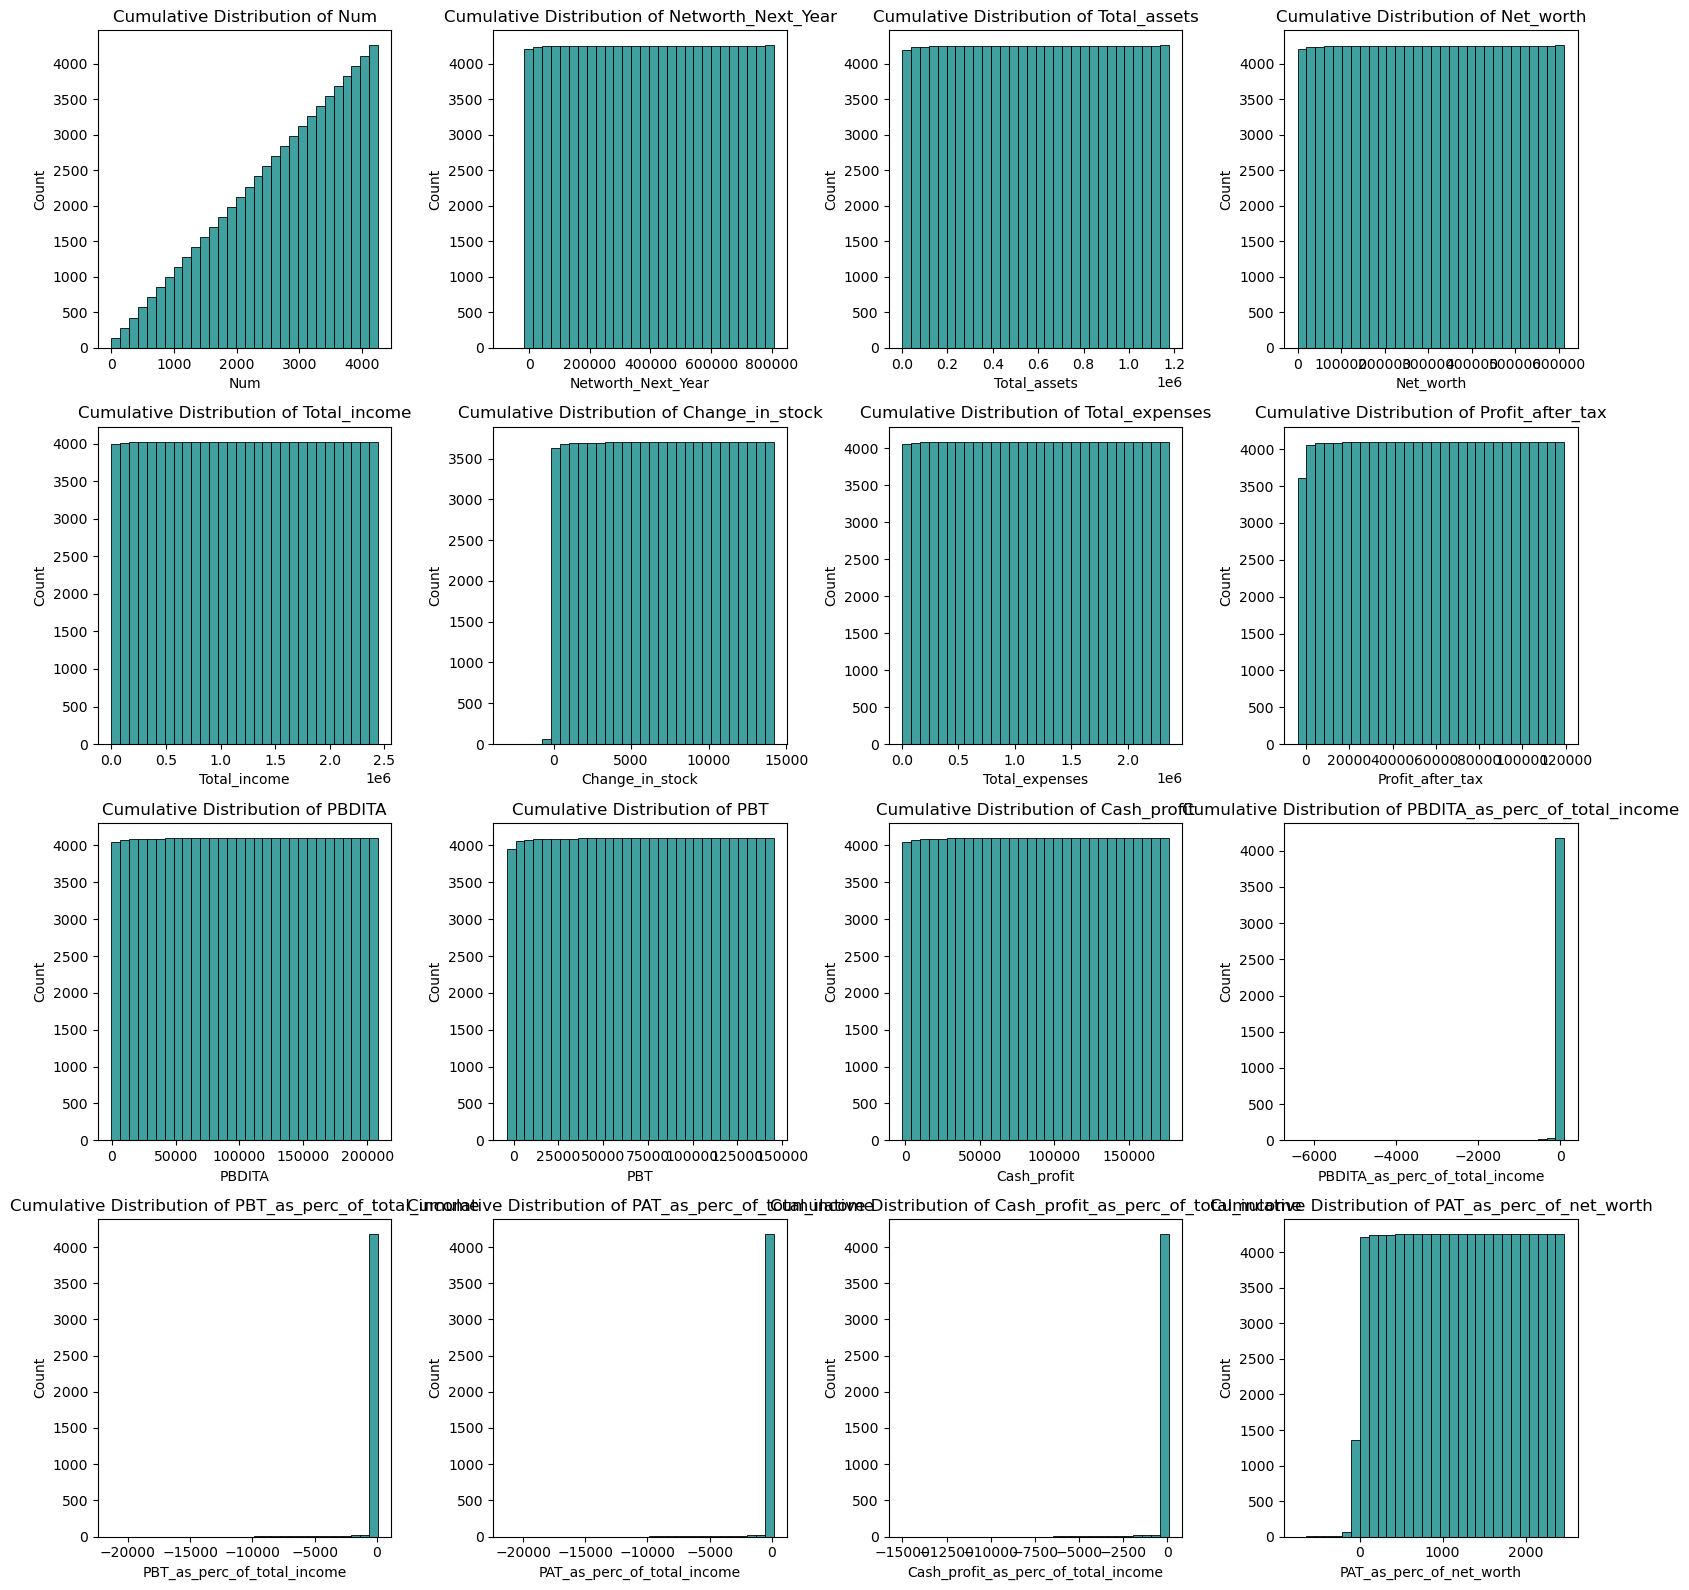

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis with Cumulative Histogram
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

for i, col in enumerate(num_cols[:16]):  # Limit to first 16 numeric columns
    sns.histplot(df[col], bins=30, cumulative=True, kde=False, ax=axes[i], color="teal")
    axes[i].set_title(f'Cumulative Distribution of {col}')

plt.tight_layout()
plt.show()


## Bivariate Analysis

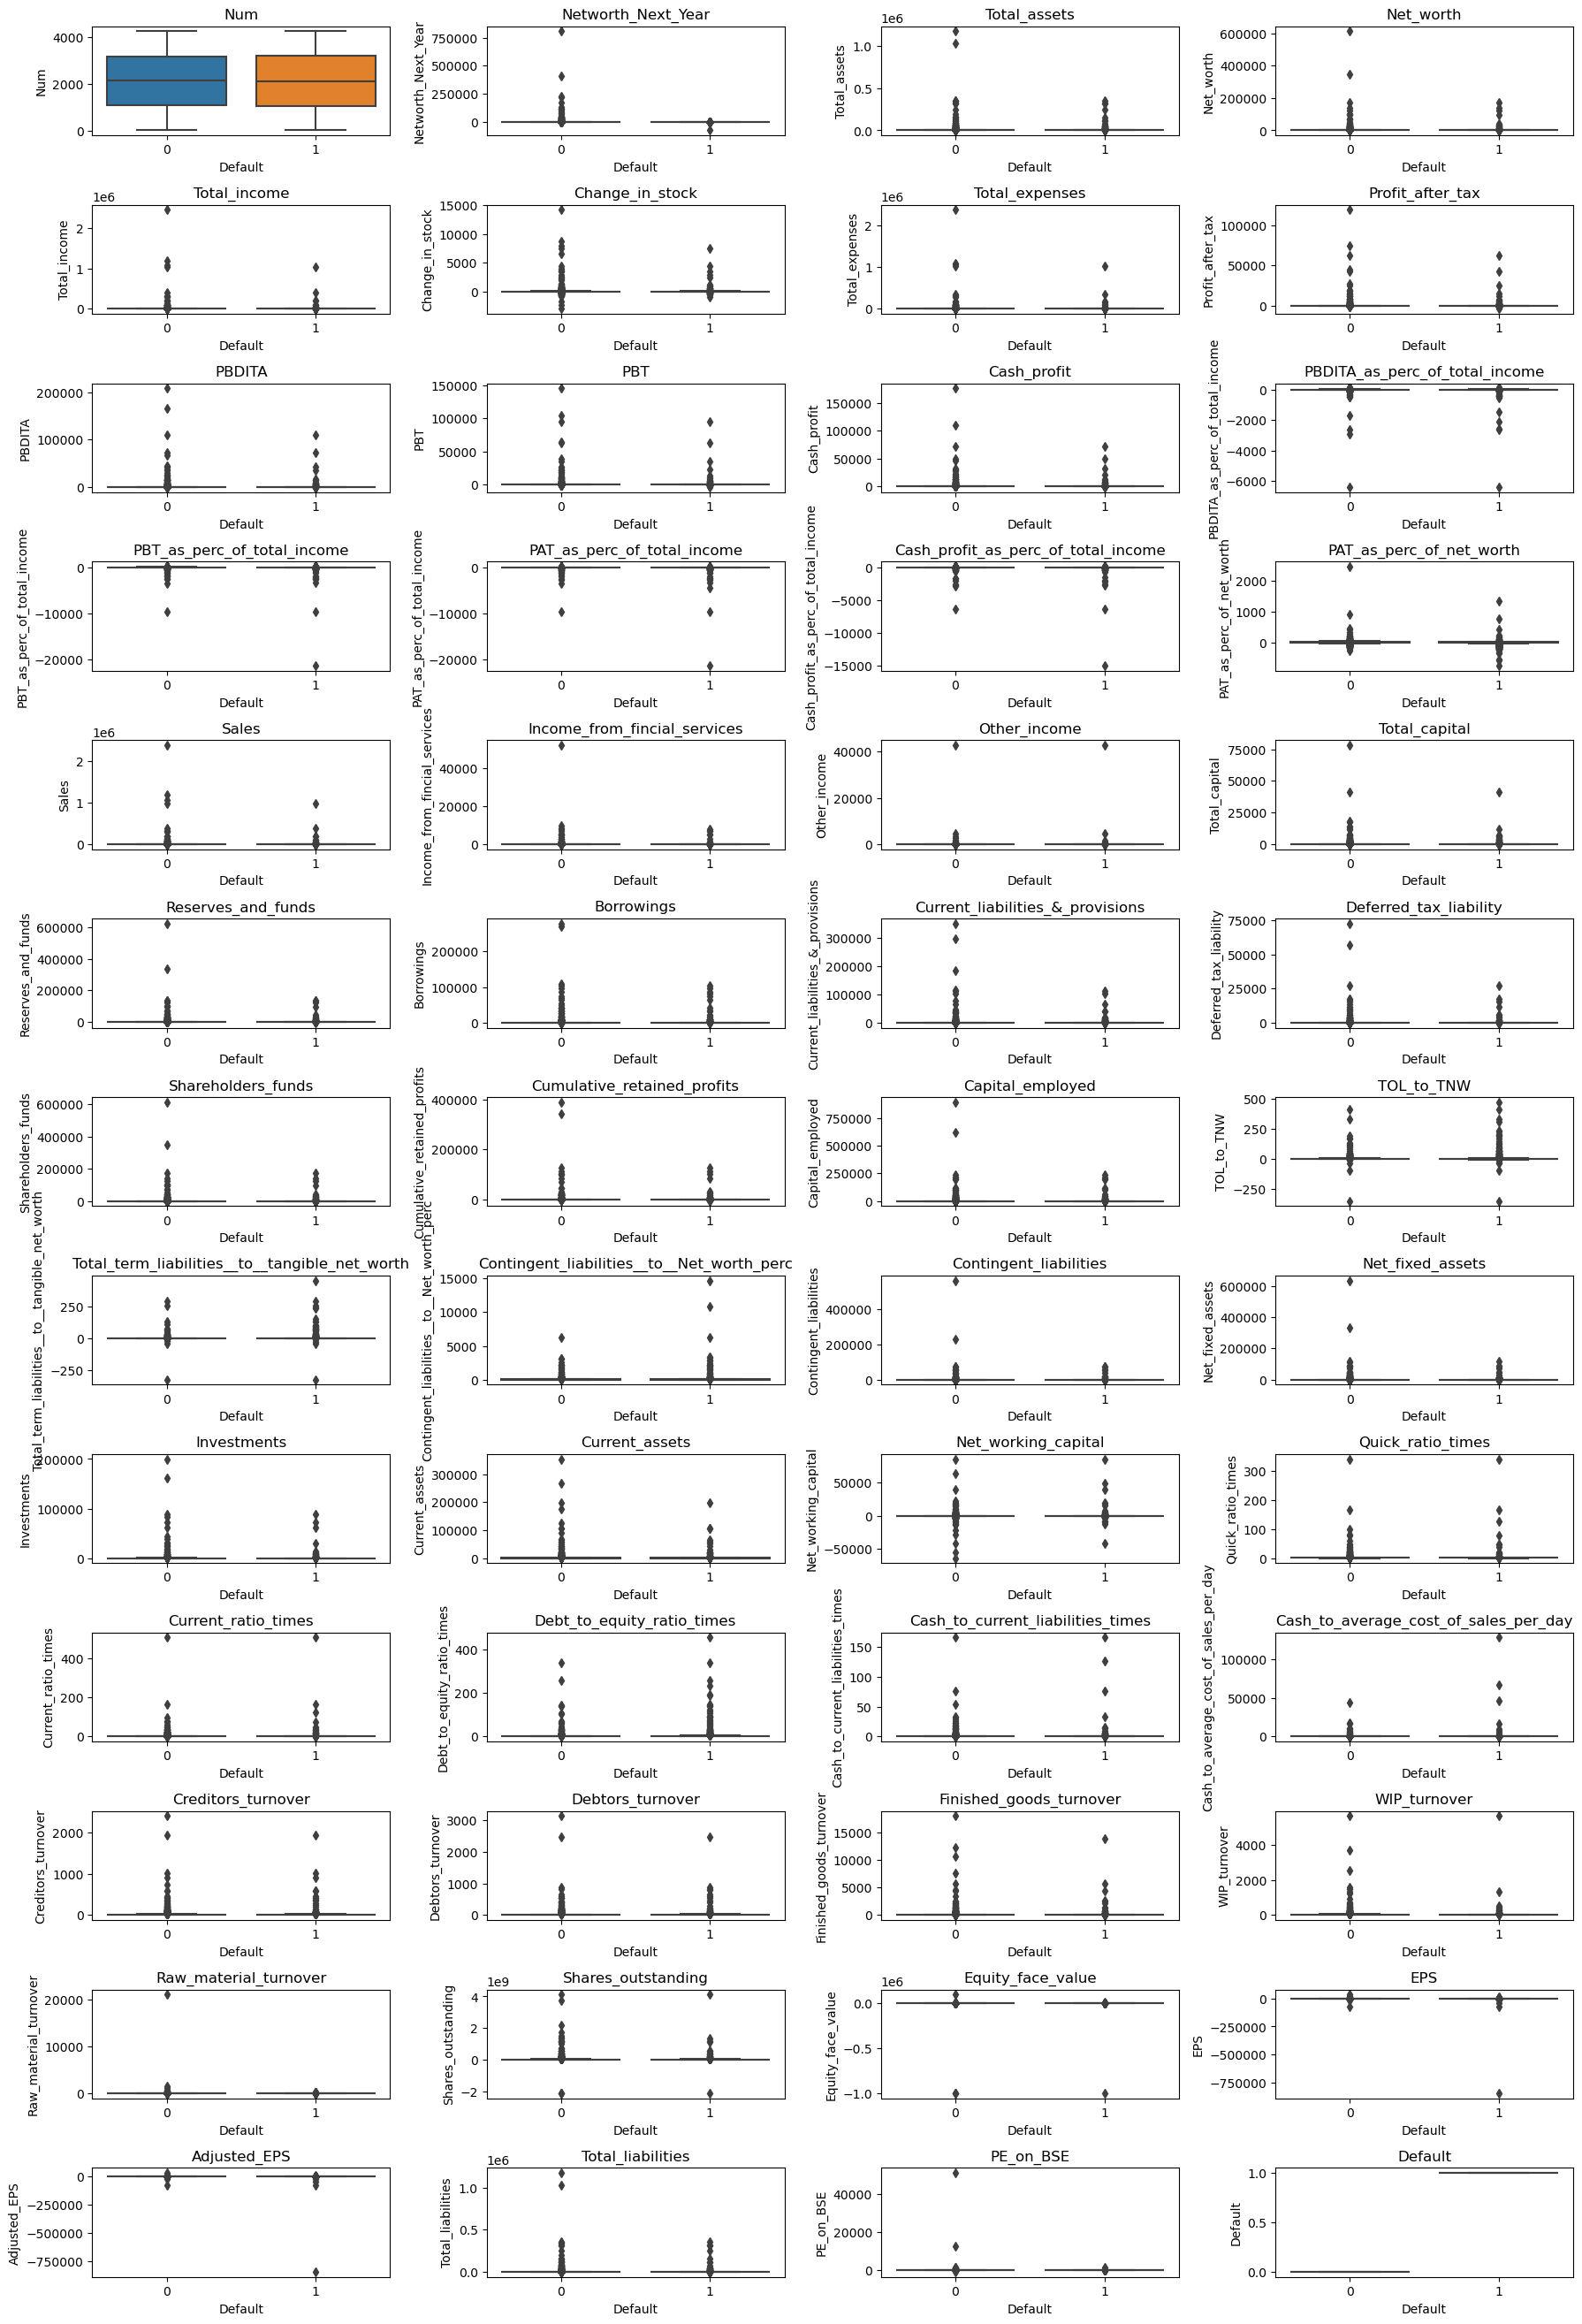

In [23]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(x=df["Default"], y=df[variable], data=df)  ## Boxplot of numerical variables against 'Default'
    plt.tight_layout()
    plt.title(variable)

plt.show()


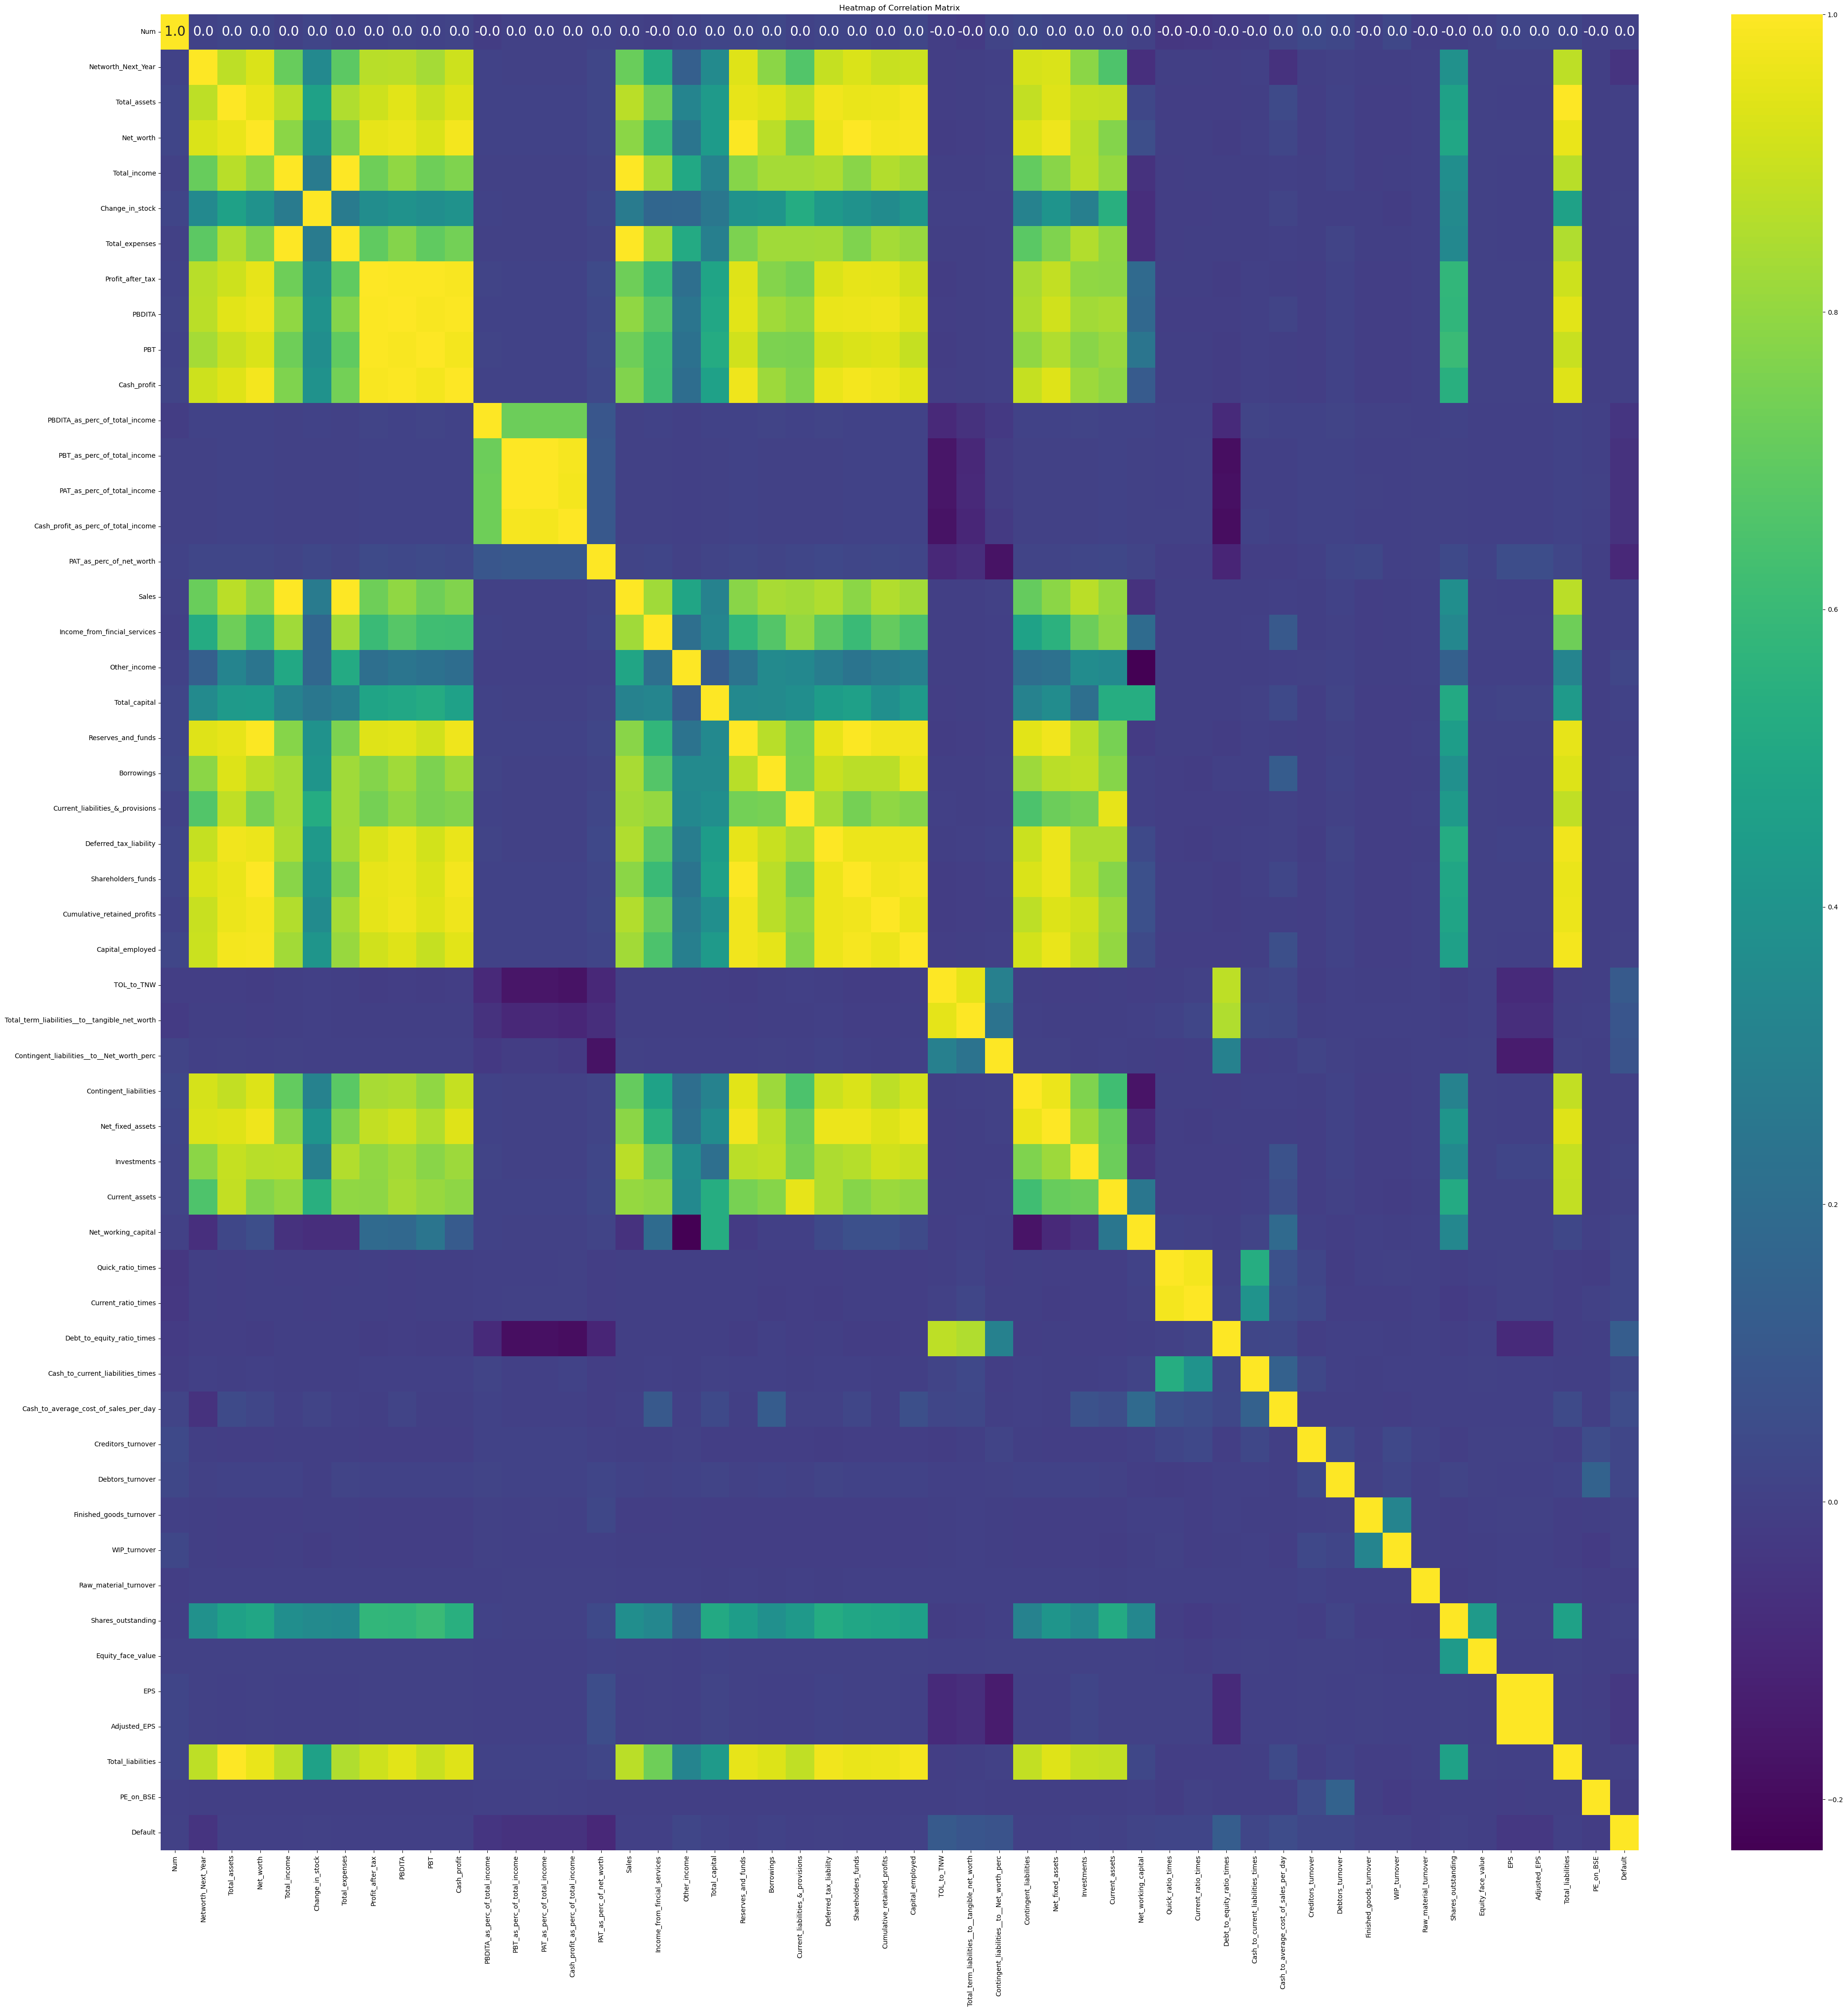

In [24]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)  ## Complete the code to get the correlation matrix for the data

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".1f", annot_kws={"size": 20})
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [25]:
### Important Financial Indicators for Default Prediction

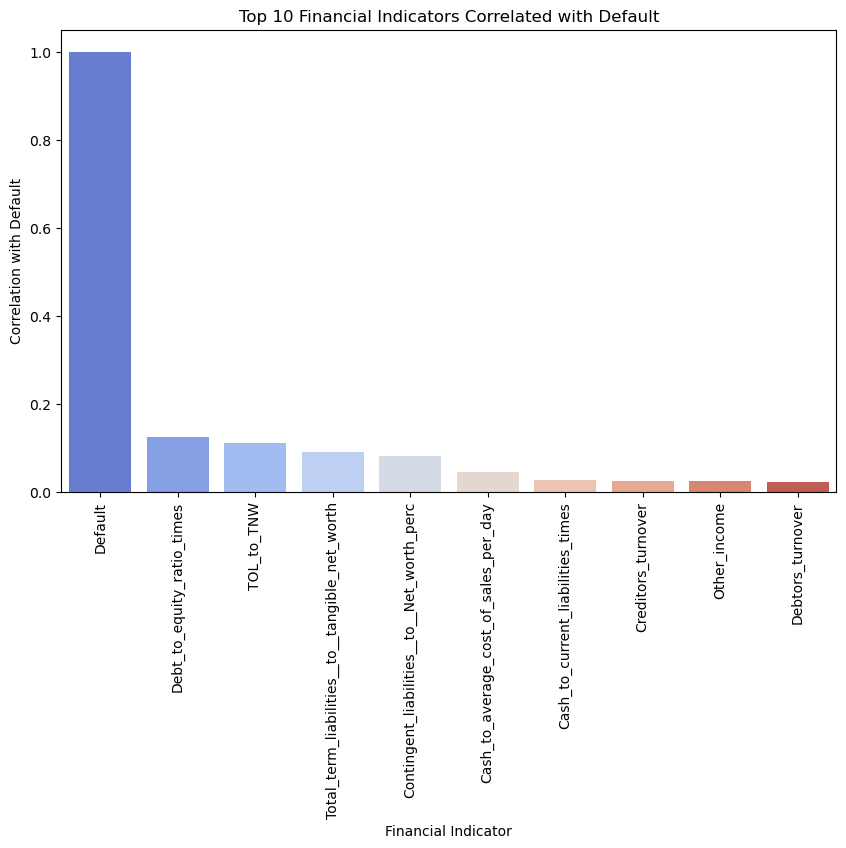

In [26]:
# 1. Identify Important Financial Indicators for Default Prediction
# Compute correlation with Default
correlation = df.corr()['Default'].sort_values(ascending=False)

# Plot correlation of top financial indicators
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index[:10], y=correlation.values[:10], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 10 Financial Indicators Correlated with Default")
plt.xlabel("Financial Indicator")
plt.ylabel("Correlation with Default")
plt.show()

In [27]:
### Debt Management Practices of Defaulters vs. Non-Defaulters

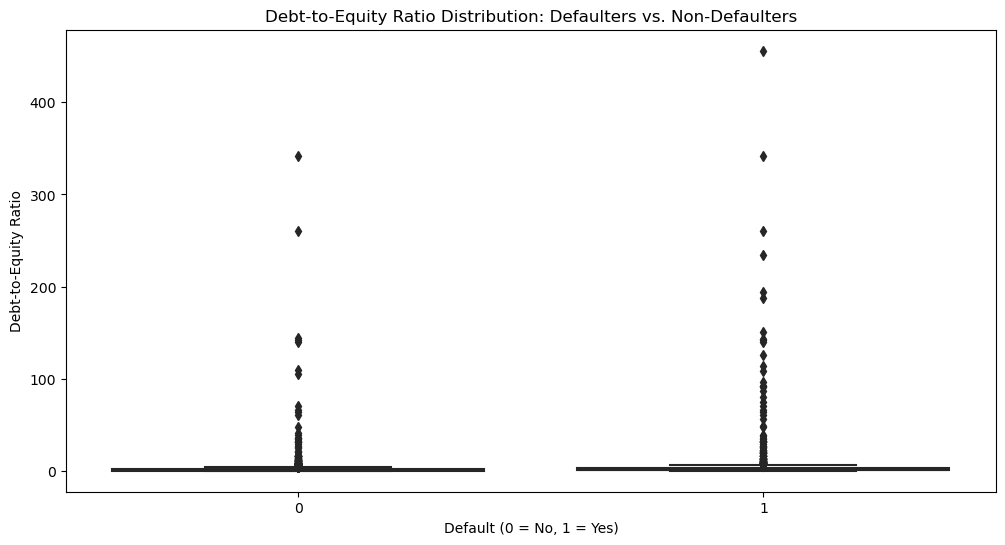

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Default'], y=df['Debt_to_equity_ratio_times'], palette=["green", "red"])
plt.title("Debt-to-Equity Ratio Distribution: Defaulters vs. Non-Defaulters")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Debt-to-Equity Ratio")
plt.show()


In [29]:
### Financial Ratios & Risk Assessment

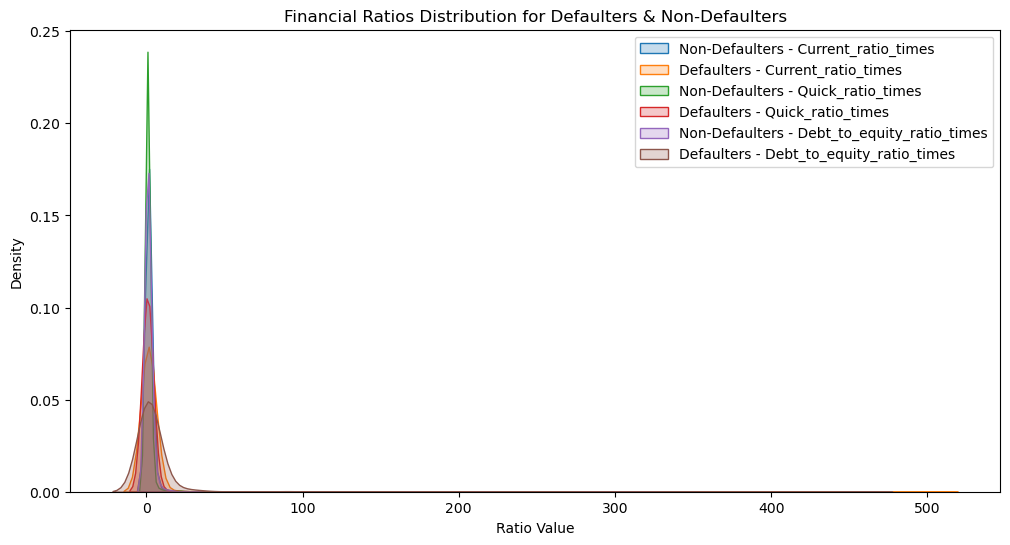

In [30]:
ratios = ['Current_ratio_times', 'Quick_ratio_times', 'Debt_to_equity_ratio_times']

plt.figure(figsize=(12, 6))
for ratio in ratios:
    sns.kdeplot(df[df['Default'] == 0][ratio], label=f"Non-Defaulters - {ratio}", shade=True)
    sns.kdeplot(df[df['Default'] == 1][ratio], label=f"Defaulters - {ratio}", shade=True)

plt.title("Financial Ratios Distribution for Defaulters & Non-Defaulters")
plt.xlabel("Ratio Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [31]:
### Patterns in Financial Data for Risk Assessment

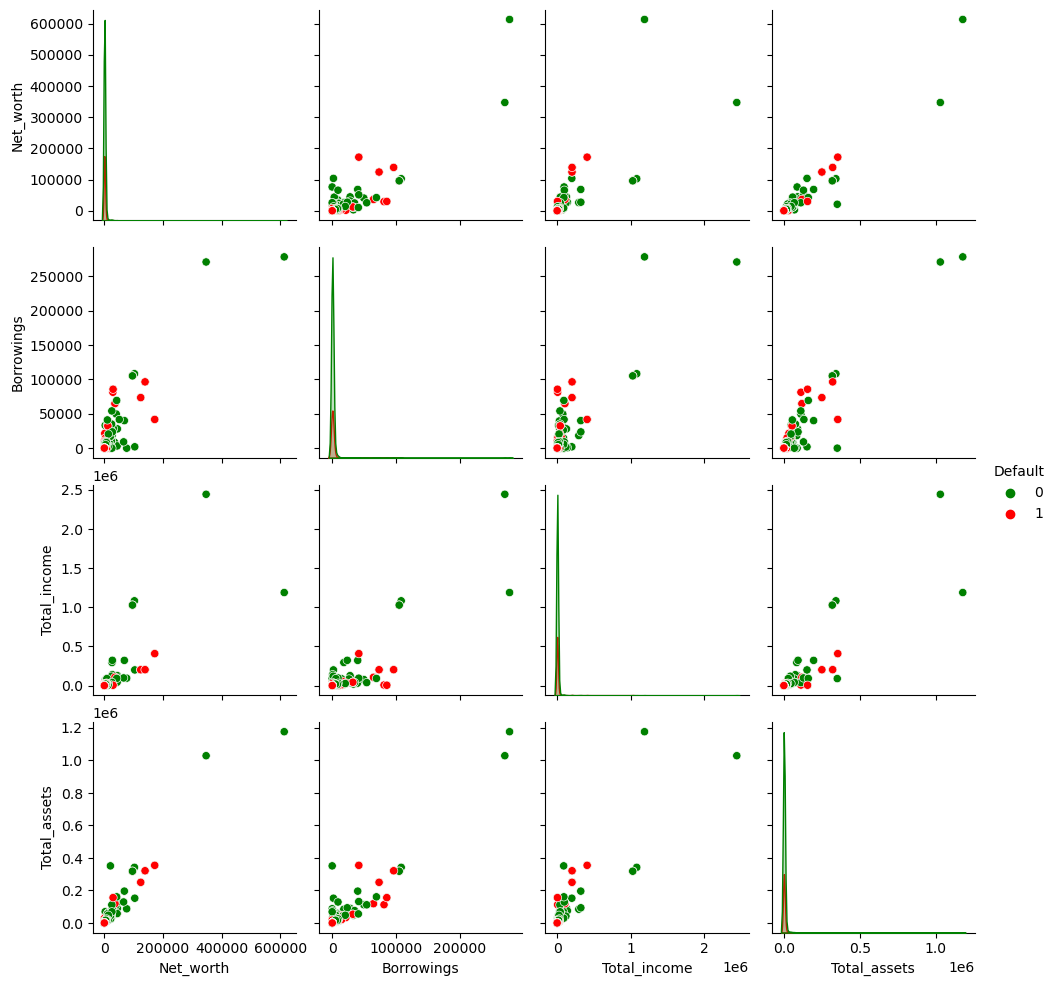

In [32]:
# Pairplot for selected financial features
features = ['Net_worth', 'Borrowings', 'Total_income', 'Total_assets', 'Default']
sns.pairplot(df[features], hue="Default", palette=["green", "red"])
plt.show()


# Data Preprocessing

## Outliers Check

In [33]:
outliers_count = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR  ## Corrected value
    upper_bound = Q3 + 1.5 * IQR  ## Corrected value

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'No. of outliers': outliers} for column, outliers in outliers_count.items()])


Number of outliers in each column:


,Column,No. of outliers
0,Num,0
1,Networth_Next_Year,624
2,Total_assets,585
3,Net_worth,595
4,Total_income,508
5,Change_in_stock,750
6,Total_expenses,518
7,Profit_after_tax,712
8,PBDITA,584
9,PBT,704


## Data Preparation for Modeling

In [34]:
# Seperating target variable from the rest of the data
X = df.drop(["Networth_Next_Year", "Default"], axis=1)  # Drop target & leakage feature
y = df["Default"]

In [35]:
# Splitting the data into train (75%) and test (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Missing Values Detection and Treatment

In [36]:
# Check missing values
X_train.isnull().sum()

Num                                                  0
Total_assets                                         0
Net_worth                                            0
Total_income                                       197
Change_in_stock                                    455
Total_expenses                                     145
Profit_after_tax                                   137
PBDITA                                             137
PBT                                                137
Cash_profit                                        137
PBDITA_as_perc_of_total_income                      61
PBT_as_perc_of_total_income                         61
PAT_as_perc_of_total_income                         61
Cash_profit_as_perc_of_total_income                 61
PAT_as_perc_of_net_worth                             0
Sales                                              254
Income_from_fincial_services                       891
Other_income                                      1251
Total_capi

In [37]:
# Check missing values
X_test.isnull().sum()

Num                                                 0
Total_assets                                        0
Net_worth                                           0
Total_income                                       34
Change_in_stock                                    95
Total_expenses                                     20
Profit_after_tax                                   17
PBDITA                                             17
PBT                                                17
Cash_profit                                        17
PBDITA_as_perc_of_total_income                     18
PBT_as_perc_of_total_income                        18
PAT_as_perc_of_total_income                        18
Cash_profit_as_perc_of_total_income                18
PAT_as_perc_of_net_worth                            0
Sales                                              51
Income_from_fincial_services                      220
Other_income                                      305
Total_capital               

In [38]:
#Replace the missing values in the data using KNN Imputer
# Initialize KNN Imputer with 5 neighbors
KNNimputerModel = KNNImputer(n_neighbors=5)  

# Fit and transform X_train
X_train = pd.DataFrame(KNNimputerModel.fit_transform(X_train), columns=X_train.columns)

# Transform X_test
X_test = pd.DataFrame(KNNimputerModel.transform(X_test), columns=X_test.columns)

In [39]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


## Scaling the Data

In [40]:
#Scaling of features is done to bring all the features to the same scale.
# Initialize StandardScaler
sc = StandardScaler()

# Fit and transform X_train
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)

# Transform X_test using the same scaler
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)  

In [41]:
X_train_scaled.head()

,Num,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,-0.173793,-0.121034,-0.128897,-0.080169,-0.060953,-0.076549,-0.101052,-0.116010,-0.099328,-0.116213,...,-0.179413,33.425564,0.061644,-0.050565,-0.112043,0.063766,0.028721,0.028816,-0.121034,-0.062126
1,-1.668788,-0.148901,-0.136583,-0.099395,-0.107712,-0.096566,-0.105022,-0.119176,-0.101838,-0.116770,...,-0.140561,0.003807,-0.216468,-0.037344,-0.082384,0.061067,0.018780,0.018874,-0.148901,0.006858
2,-1.621560,-0.112539,-0.116087,-0.089518,-0.570696,-0.089283,-0.127519,-0.120017,-0.123553,-0.133019,...,-0.117321,-0.148849,-0.235657,-0.041768,0.107237,0.061067,0.018615,0.018709,-0.112539,-0.078261
3,-1.203841,-0.161289,-0.149963,-0.106730,-0.105867,-0.103956,-0.107448,-0.124742,-0.103719,-0.123225,...,-0.074775,-0.145369,-0.206171,-0.056171,-0.112362,0.061517,0.018702,0.018796,-0.161289,-0.062126
4,0.103058,0.002038,-0.081454,-0.036424,-0.379350,-0.043405,0.034281,0.048326,0.035118,0.029328,...,0.243073,-0.151843,-0.243333,-0.047448,-0.084767,0.061067,0.023561,0.023656,0.002038,-0.120577


In [42]:
X_test_scaled.head()

,Num,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1.620038,-0.160613,-0.147162,-0.106087,-0.101560,-0.103316,-0.106478,-0.124742,-0.102913,-0.122186,...,-0.146281,-0.032696,0.056683,-0.050289,-0.094205,0.061067,0.018755,0.018849,-0.160613,-0.068155
1,0.690959,-0.144332,-0.140313,-0.095772,-0.116941,-0.093141,-0.101625,-0.114526,-0.099358,-0.113023,...,-0.151525,-0.052398,0.127077,-0.046242,-0.066836,0.061067,0.018825,0.018919,-0.144332,-0.064234
2,1.182776,-0.153130,-0.143817,-0.092521,-0.076027,-0.089260,-0.103699,-0.120042,-0.100762,-0.118847,...,0.008054,-0.129484,-0.133530,-0.042371,-0.110935,0.063766,0.020807,0.020902,-0.153130,-0.086355
3,-1.321910,-0.159297,-0.149034,-0.105025,-0.113557,-0.102635,-0.101934,-0.121551,-0.099956,-0.118699,...,-0.006247,-0.089313,-0.129973,-0.038978,-0.081375,0.061067,0.018842,0.018936,-0.159297,-0.129733
4,1.278860,-0.116443,-0.082782,-0.069961,-0.022191,-0.064223,-0.122578,-0.061718,-0.115697,-0.043943,...,-0.141514,-0.103084,-0.168727,-0.057075,-0.022552,0.061067,0.018537,0.018632,-0.116443,-0.163546


# Model Building

## Model Evaluation Criterion

*Metric of Choice*
-


To assess the performance of the predictive model for identifying defaulter companies based on financial metrics, selecting the appropriate evaluation metrics is crucial. Since the problem involves classification, where the objective is to predict whether a company will default (binary classification: defaulter vs. non-defaulter), the following evaluation metrics are considered:
Key Metrics and Justification

1. Accuracy

Definition: Accuracy measures the proportion of correctly classified instances (both defaulters and non-defaulters) to the total number of instances.

Justification: Accuracy alone is insufficient in cases of class imbalance, where non-defaulters may significantly outnumber defaulters. Additional metrics are required for a balanced evaluation.

2. Precision & Recall

Precision (Positive Predictive Value): Measures the proportion of correctly predicted defaulters to the total instances predicted as defaulters.

Formula: Precision = TP / (TP + FP)

Recall (Sensitivity or True Positive Rate): Measures the proportion of actual defaulters correctly identified.

Formula: Recall = TP / (TP + FN)

Justification: These metrics are essential for evaluating false positives (incorrectly tagging a company as a defaulter) and false negatives (failing to identify an actual defaulter), both of which have significant financial implications.

3. F1-Score

Definition: The harmonic mean of precision and recall, providing a balance between the two metrics.

Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)

Justification: Since both false positives and false negatives impact financial decision-making, the F1-score ensures a balance between precision and recall.

4. ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)

Definition: Evaluates the model’s ability to distinguish between defaulters and non-defaulters by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold values.

Justification: A higher AUC value indicates better model performance in classification.

5. Confusion Matrix

Definition: Provides a summary of classification results, displaying the number of true positives, true negatives, false positives, and false negatives.

Justification: It helps in understanding the distribution of predictions and assessing model performance beyond a single metric.

Conclusion

Given the potential imbalance in the dataset, a combination of F1-score, ROC-AUC will be the primary evaluation metrics, ensuring robustness in detecting defaulters while minimizing false positives and false negatives. Accuracy, precision, recall, confusion matrix, and Log Loss will supplement the analysis for a holistic model assessment.

# Model Selection and Justification

1. Logistic Regression

Why?

A simple and interpretable model

Suitable for problems with linear relationships

Outputs probability scores, making threshold adjustments easier

2. Random Forest

Why?

Captures complex non-linear relationships

Handles missing values well

Reduces overfitting by averaging multiple decision trees

Model Training Steps

Train Logistic Regression and Random Forest models using training data.

Tune hyperparameters (e.g., regularization for Logistic Regression, number of trees for Random Forest).

Predict outcomes on the test dataset.



In [43]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [44]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [45]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [46]:
X_train_with_intercept.head()

,const,Num,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1.0,-0.173793,-0.121034,-0.128897,-0.080169,-0.060953,-0.076549,-0.101052,-0.116010,-0.099328,...,-0.179413,33.425564,0.061644,-0.050565,-0.112043,0.063766,0.028721,0.028816,-0.121034,-0.062126
1,1.0,-1.668788,-0.148901,-0.136583,-0.099395,-0.107712,-0.096566,-0.105022,-0.119176,-0.101838,...,-0.140561,0.003807,-0.216468,-0.037344,-0.082384,0.061067,0.018780,0.018874,-0.148901,0.006858
2,1.0,-1.621560,-0.112539,-0.116087,-0.089518,-0.570696,-0.089283,-0.127519,-0.120017,-0.123553,...,-0.117321,-0.148849,-0.235657,-0.041768,0.107237,0.061067,0.018615,0.018709,-0.112539,-0.078261
3,1.0,-1.203841,-0.161289,-0.149963,-0.106730,-0.105867,-0.103956,-0.107448,-0.124742,-0.103719,...,-0.074775,-0.145369,-0.206171,-0.056171,-0.112362,0.061517,0.018702,0.018796,-0.161289,-0.062126
4,1.0,0.103058,0.002038,-0.081454,-0.036424,-0.379350,-0.043405,0.034281,0.048326,0.035118,...,0.243073,-0.151843,-0.243333,-0.047448,-0.084767,0.061067,0.023561,0.023656,0.002038,-0.120577


In [47]:
y_train.reset_index(inplace = True, drop = True)

In [48]:
# Define and fit the Logistic Regression model
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit(method="lbfgs", maxiter=200)

# Print model summary
print(LogisticReg.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 3404
Model:                          Logit   Df Residuals:                     3354
Method:                           MLE   Df Model:                           49
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                 0.04937
Time:                        11:29:21   Log-Likelihood:                -1673.3
converged:                      False   LL-Null:                       -1760.3
Covariance Type:            nonrobust   LLR p-value:                 7.193e-16
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.3889        nan        nan        nan         nan         nan
Num                    

### Logistic Regression Model - Training Performance

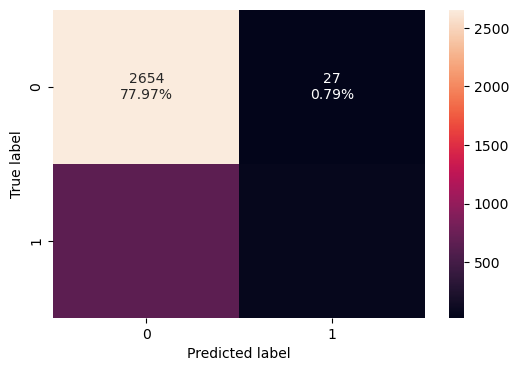

In [49]:
model_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [50]:
logistic_regression_perf_train = model_performance_classification(LogisticReg, X_train_with_intercept, y_train)
logistic_regression_perf_train

,Accuracy,Recall,Precision,F1
0,0.797591,0.084371,0.693182,0.150432


### Logistic Regression Model - Test Performance

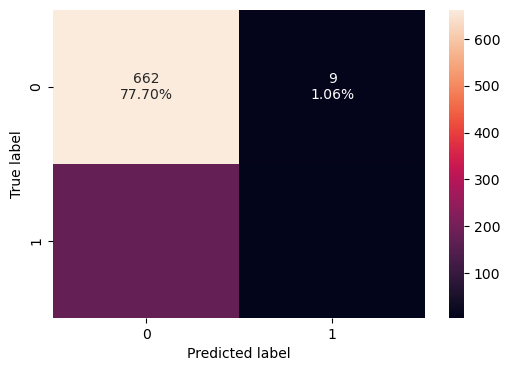

In [51]:
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

In [52]:
logistic_regression_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test)
logistic_regression_perf_test

,Accuracy,Recall,Precision,F1
0,0.782864,0.027624,0.357143,0.051282


Why is the Model Performing Poorly?
Severe Class Imbalance: The dataset likely has far more non-defaulters (0s) than defaulters (1s).
Decision Threshold Issue: The model defaults to predicting "non-defaulter" because it is the easiest way to get high accuracy.
Feature Importance: Some financial metrics may not be strongly differentiating defaulters from non-defaulters.


## Random Forest

In [53]:
# Define Random Forest Classifier with random state 42
rf_classifier = RandomForestClassifier(random_state=42)

# Fit Random Forest model on the training data
rf_model = rf_classifier.fit(X_train_scaled, y_train)

### Random Forest Model - Training Performance

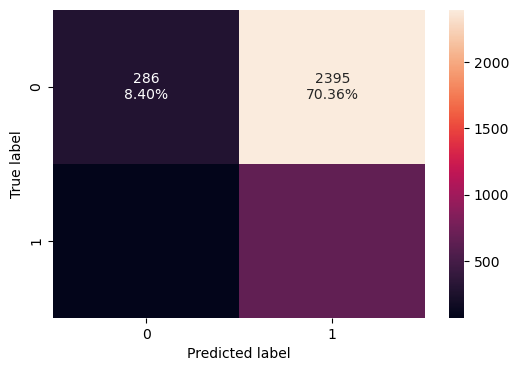

In [54]:
model_confusion_matrix(rf_model, X_train, y_train)

In [55]:
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

,Accuracy,Recall,Precision,F1
0,0.275558,0.901798,0.213981,0.345889


Why is the Accuracy So Low?
Class Imbalance: If there are far fewer defaulters than non-defaulters, the model might be overcompensating.
Overfitting on Training Data: The model could be memorizing patterns instead of generalizing.
Threshold Issue: The default threshold (0.5) might not be optimal.


### Random Forest Model - Test Performance

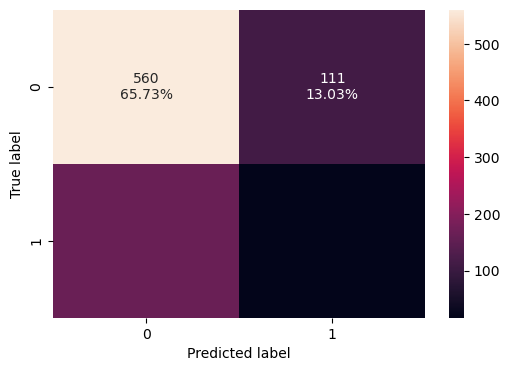

In [56]:
model_confusion_matrix(rf_model, X_test_scaled, y_test)

In [57]:
random_forest_perf_test = model_performance_classification(rf_model, X_test_scaled, y_test)
random_forest_perf_test

,Accuracy,Recall,Precision,F1
0,0.67723,0.093923,0.132812,0.110032


# Model Performance Improvement

3. Model Performance Check Across Different Metrics

Performance Comparison

Evaluate both models using the selected metrics:

F1-Score (balance between precision and recall)

ROC-AUC (model discrimination ability)

Precision & Recall (assessing false positive/false negative impact)

MCC (reliable single-score evaluation)

Confusion Matrix (detailed performance breakdown)

## Model Performance Improvement - Logistic Regression

In [58]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [59]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_scaled)
print("Variance Inflation Factors:")
vif_result

Variance Inflation Factors:


,Variable,VIF
0,Num,1.015593e+00
1,Total_assets,inf
2,Net_worth,3.441165e+03
3,Total_income,2.333541e+06
4,Change_in_stock,1.816728e+02
5,Total_expenses,1.965356e+06
6,Profit_after_tax,9.594179e+03
7,PBDITA,9.781308e+02
8,PBT,1.473675e+03
9,Cash_profit,5.974393e+02


In [60]:
high_vif_columns = []
for i, row in vif_result.iterrows():
    if row['VIF'] >= 5:
        high_vif_columns.append(row['Variable'])
high_vif_columns

['Total_assets',
 'Net_worth',
 'Total_income',
 'Change_in_stock',
 'Total_expenses',
 'Profit_after_tax',
 'PBDITA',
 'PBT',
 'Cash_profit',
 'PBT_as_perc_of_total_income',
 'PAT_as_perc_of_total_income',
 'Cash_profit_as_perc_of_total_income',
 'Sales',
 'Income_from_fincial_services',
 'Other_income',
 'Total_capital',
 'Reserves_and_funds',
 'Borrowings',
 'Current_liabilities_&_provisions',
 'Deferred_tax_liability',
 'Shareholders_funds',
 'Cumulative_retained_profits',
 'Capital_employed',
 'TOL_to_TNW',
 'Total_term_liabilities__to__tangible_net_worth',
 'Contingent_liabilities',
 'Net_fixed_assets',
 'Investments',
 'Current_assets',
 'Net_working_capital',
 'Quick_ratio_times',
 'Current_ratio_times',
 'Shares_outstanding',
 'EPS',
 'Adjusted_EPS',
 'Total_liabilities']

In [61]:
# Dropping columns with VIF > 5
X_train_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)
X_test_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)

In [62]:
X_train_scaled.shape

(3404, 14)

In [63]:
X_test_scaled.shape

(852, 14)

In [64]:
X_train_new_with_intercept = SM.add_constant(X_train_scaled)
X_test_new_with_intercept = SM.add_constant(X_test_scaled)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Compute VIF
vif_result = calculate_vif(X_train_scaled)
print("Variance Inflation Factors:\n", vif_result)

# Remove features with VIF > 5
high_vif_columns = vif_result[vif_result["VIF"] > 5]["Feature"].tolist()
X_train_scaled.drop(columns=high_vif_columns, inplace=True)
X_test_scaled.drop(columns=high_vif_columns, inplace=True)


Variance Inflation Factors:
                                        Feature       VIF
0                                          Num  1.005533
1               PBDITA_as_perc_of_total_income  1.018344
2                     PAT_as_perc_of_net_worth  1.050187
3   Contingent_liabilities__to__Net_worth_perc  1.097282
4                   Debt_to_equity_ratio_times  1.078778
5            Cash_to_current_liabilities_times  1.027981
6        Cash_to_average_cost_of_sales_per_day  1.026569
7                           Creditors_turnover  1.004718
8                             Debtors_turnover  1.003189
9                      Finished_goods_turnover  1.048380
10                                WIP_turnover  1.051499
11                       Raw_material_turnover  1.000425
12                           Equity_face_value  1.000879
13                                   PE_on_BSE  1.001222


In [66]:
# Drop constant columns (zero variance)
constant_columns = [col for col in X_train_scaled.columns if X_train_scaled[col].nunique() == 1]
X_train_scaled.drop(columns=constant_columns, inplace=True)
X_test_scaled.drop(columns=constant_columns, inplace=True)


In [67]:
# Fit Logistic Regression Model with different solver
LogisticReg_improved = SM.Logit(y_train, SM.add_constant(X_train_scaled)).fit(method="bfgs")


         Current function value: 0.495838
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


In [68]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logistic_reg.fit(X_train_scaled, y_train)

# Print coefficients
print("Model Coefficients:\n", logistic_reg.coef_)


Model Coefficients:
 [[ 0.00409932 -0.01851313 -0.50455646  0.11695559  0.27615627  0.02231198
   0.1660146   0.04117872  0.07205445  0.01193195 -0.07758613 -0.71691077
  -0.04181831 -0.04882757]]


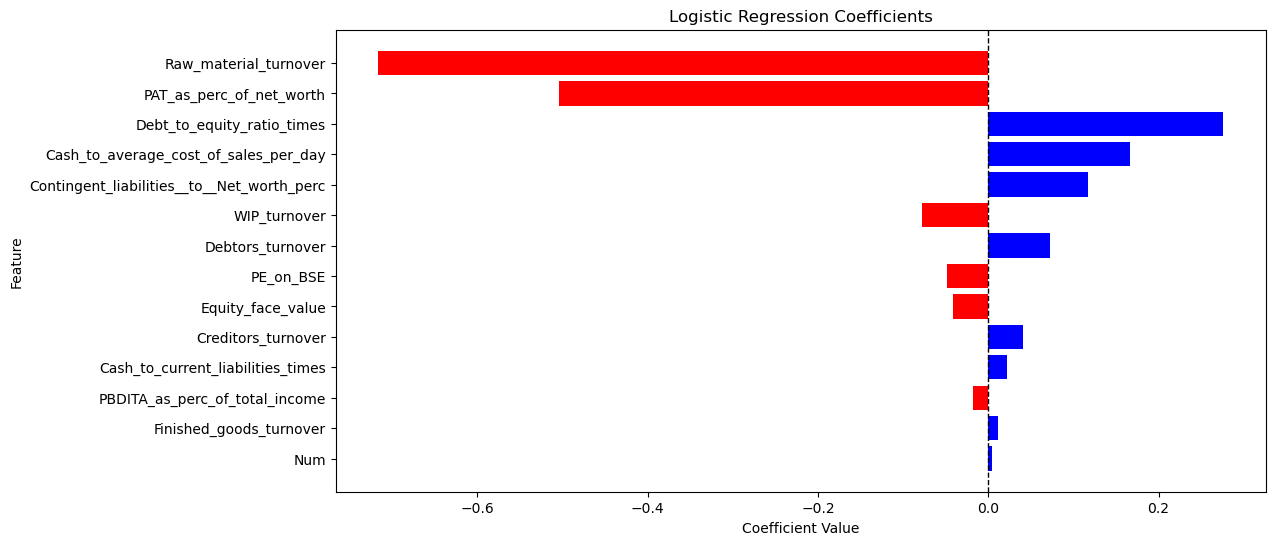

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names (assuming you have them)
feature_names = X_train_scaled.columns  # If using a DataFrame
coefficients = logistic_reg.coef_.flatten()  # Convert to 1D array

# Sort features by absolute coefficient values
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(sorted_features, sorted_coefficients, color=['red' if c < 0 else 'blue' for c in sorted_coefficients])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Logistic Regression Coefficients")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Vertical line at zero
plt.gca().invert_yaxis()  # Highest values at top
plt.show()


In [70]:
# Finding Optimal Threshold value
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

0.213

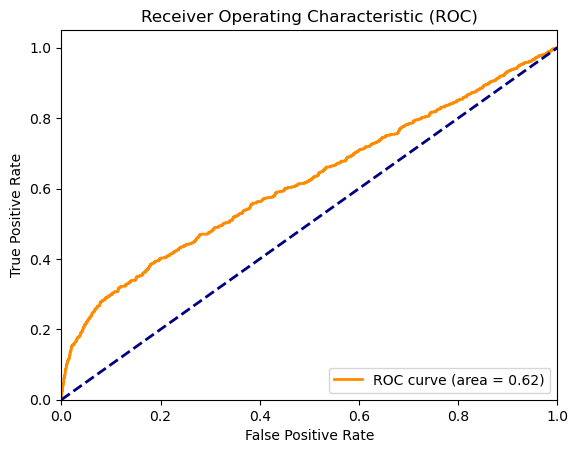

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_train, logit_y_pred)  

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_train, logit_y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Logistic Regression Performance - Training Set

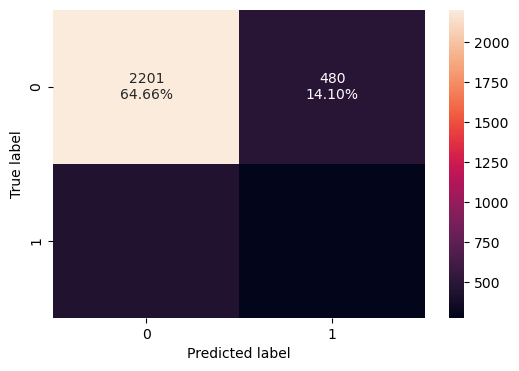

In [72]:
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [73]:
logistic_regression_tuned_perf_train = model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
)
logistic_regression_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.727967,0.383126,0.365918,0.374324


### Logistic Regression Performance - Test Set

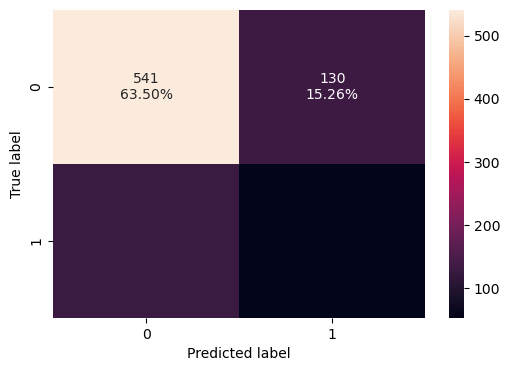

In [74]:
model_confusion_matrix(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)

In [75]:
logistic_regression_tuned_perf_test = model_performance_classification(
    LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit
)
logistic_regression_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.697183,0.292818,0.289617,0.291209


## Model Performance Improvement - Random Forest

In [76]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [77]:
# Access the best estimator directly if needed
best_rf_classifier = grid_search.best_estimator_

In [78]:
params_used = best_rf_classifier.get_params()

# Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 5
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 4
min_samples_split: 10
min_weight_fraction_leaf: 0.0
n_estimators: 50
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


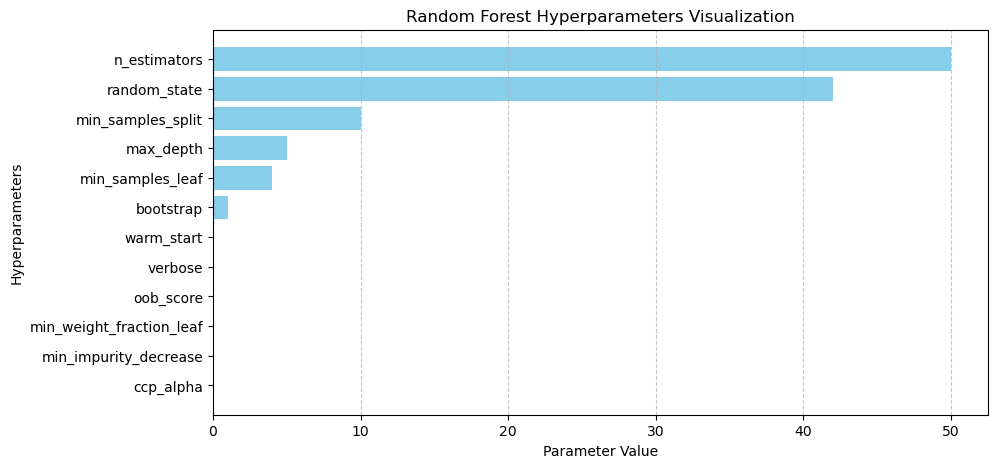

In [79]:
import matplotlib.pyplot as plt

# Extract parameters
params_used = best_rf_classifier.get_params()

# Filter only numeric parameters for better visualization
numeric_params = {k: v for k, v in params_used.items() if isinstance(v, (int, float))}

# Sort parameters for better readability
sorted_params = dict(sorted(numeric_params.items(), key=lambda item: item[1]))

# Plot the hyperparameters
plt.figure(figsize=(10, 5))
plt.barh(list(sorted_params.keys()), list(sorted_params.values()), color='skyblue')

# Add labels
plt.xlabel("Parameter Value")
plt.ylabel("Hyperparameters")
plt.title("Random Forest Hyperparameters Visualization")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


### Random Forest Performance - Training Set

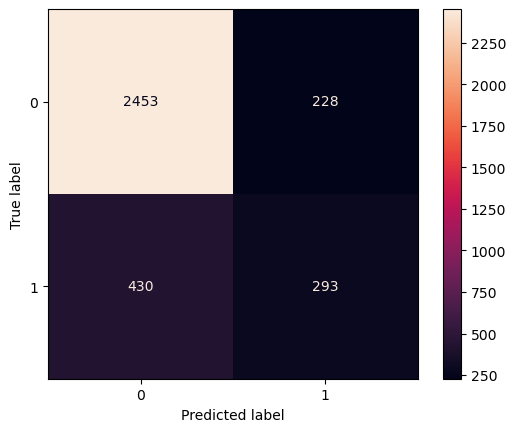

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions on the training set
y_train_pred_class = best_rf_classifier.predict(X_train)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_class)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='rocket')

In [81]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train, y_train)
random_forest_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.806698,0.405256,0.56238,0.471061


### Random Forest Performance - Test Set

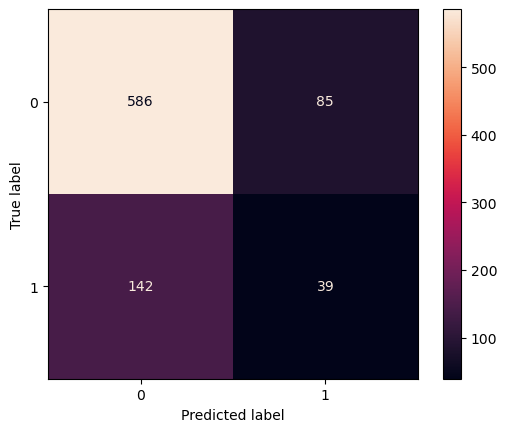

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions on the training set
y_test_pred_class = best_rf_classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='rocket')

In [83]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test, y_test)
random_forest_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.733568,0.21547,0.314516,0.255738


# Model Comparison and Final Model Selection

Results Interpretation

Compare models based on the metrics above (present results in tables/graphs).

Discuss trade-offs:

If a model has higher recall, it catches more defaulters but may misclassify non-defaulters.

If a model has higher precision, it avoids false alarms but may miss actual defaulters.

In [84]:
models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.797591,0.727967,0.275558,0.806698
Recall,0.084371,0.383126,0.901798,0.405256
Precision,0.693182,0.365918,0.213981,0.562380
F1,0.150432,0.374324,0.345889,0.471061


In [85]:
models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]

print("Testing performance comparison:")
models_test_comp_df


Testing performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.782864,0.697183,0.677230,0.733568
Recall,0.027624,0.292818,0.093923,0.215470
Precision,0.357143,0.289617,0.132812,0.314516
F1,0.051282,0.291209,0.110032,0.255738


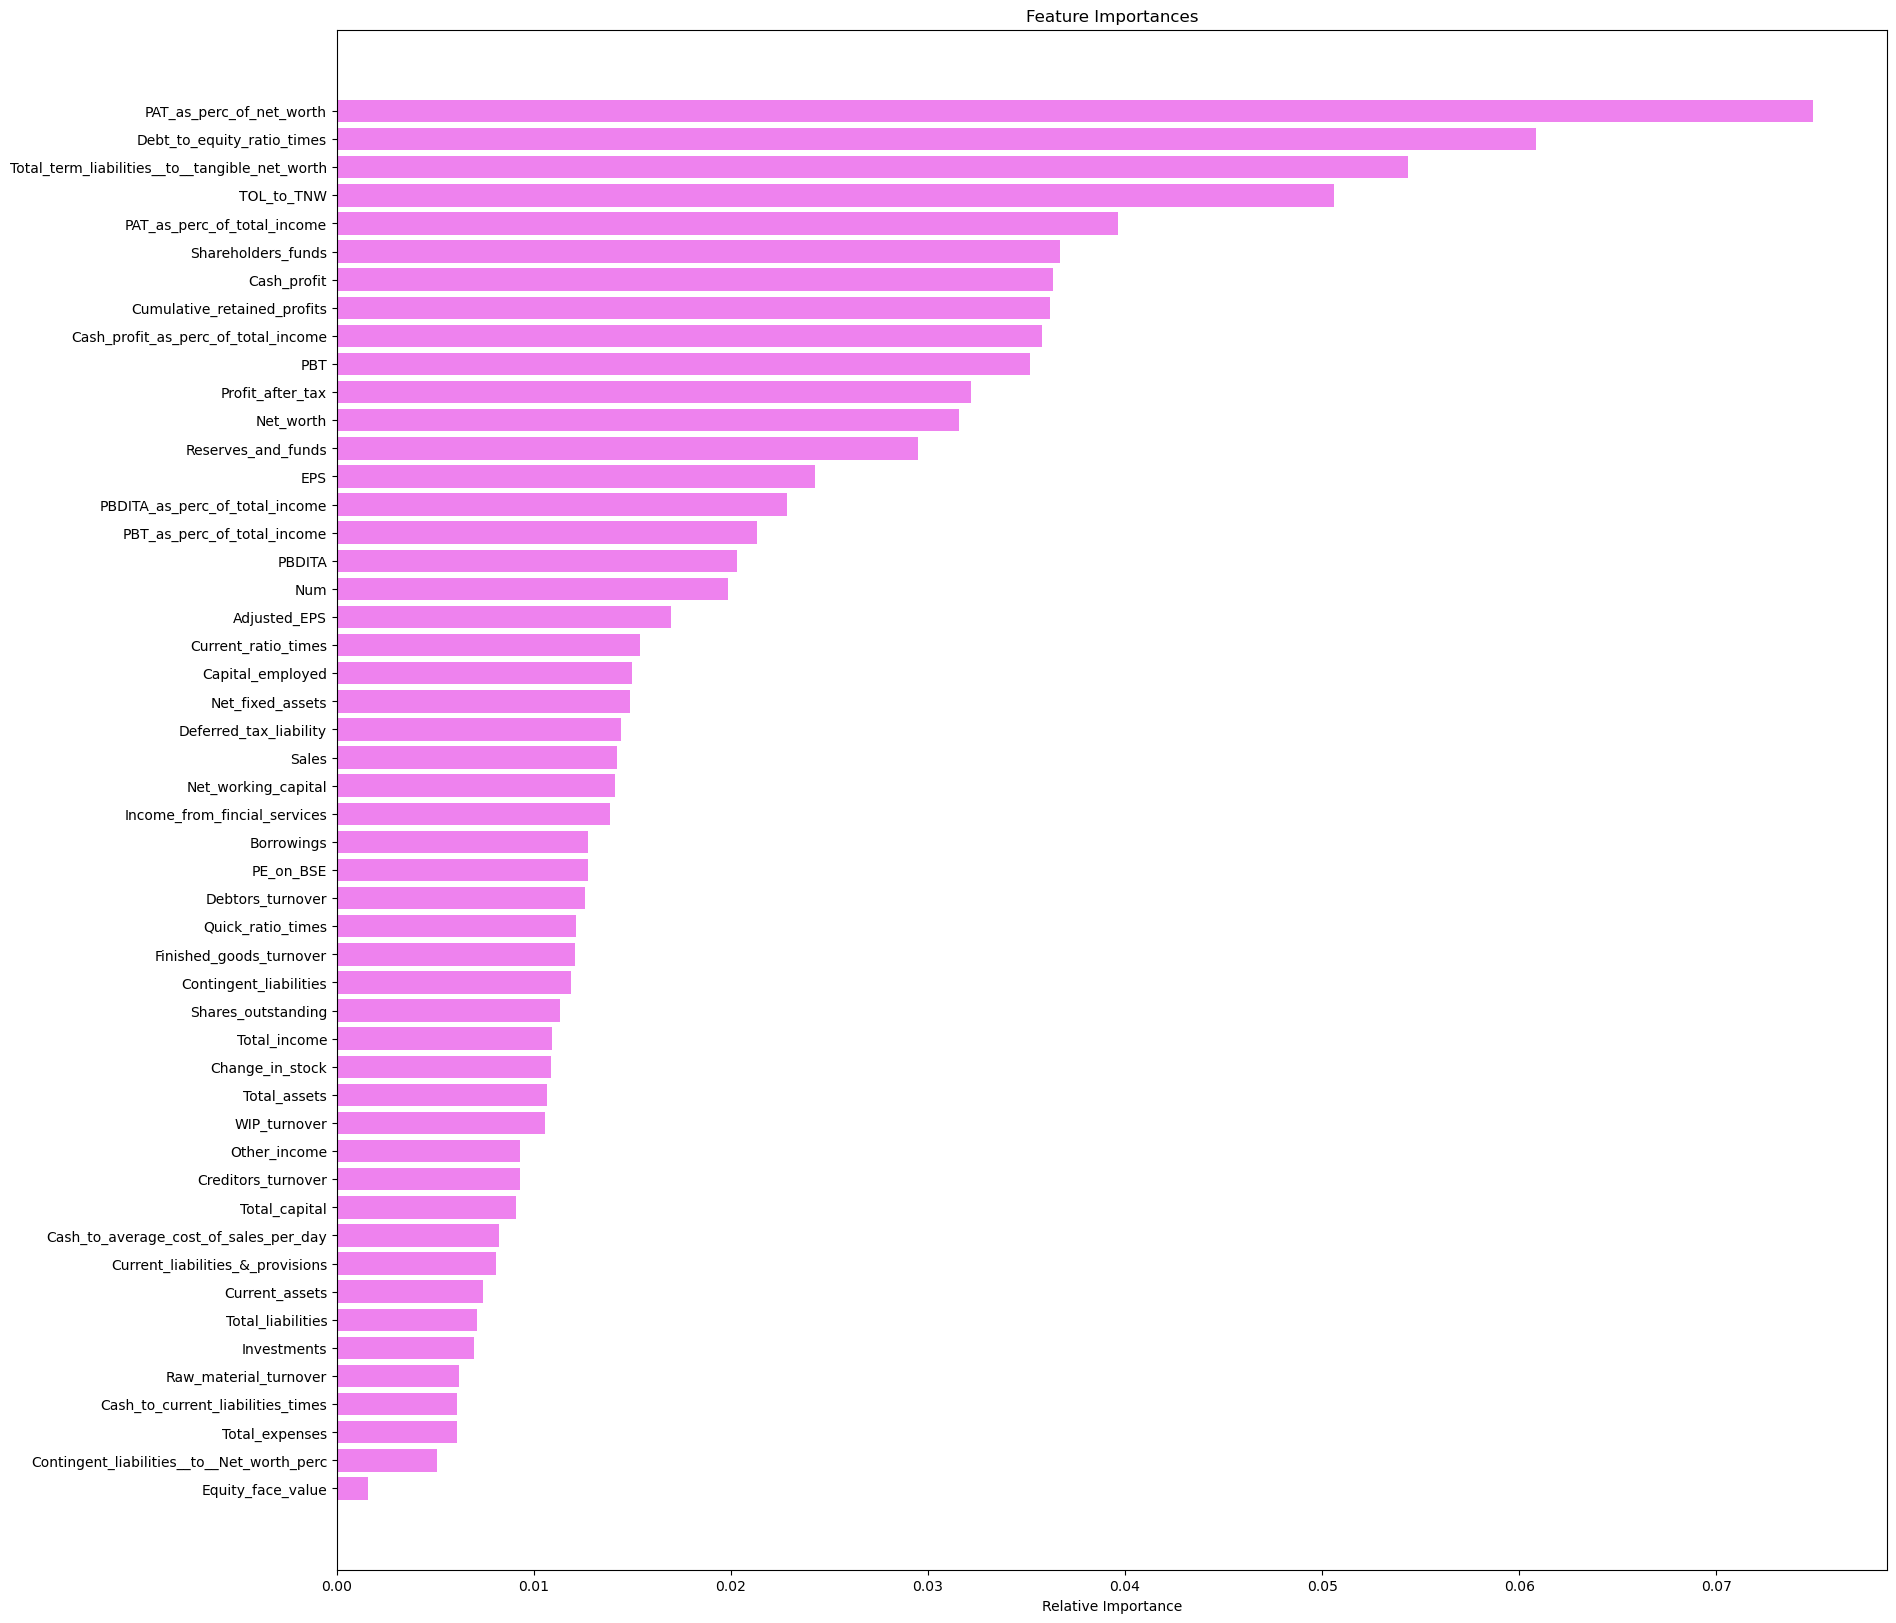

In [86]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Conclusions and Recommendations

Tuned Logistic Regression significantly improved recall compared to the base model, suggesting better identification of defaulters.
Tuned Random Forest outperformed all models in accuracy (0.7336), precision (0.3145), and F1-score (0.2557), making it the best-performing model overall.
Random Forest models captured more complex patterns but required tuning for better performance.
Logistic Regression had high precision but struggled with recall, meaning it was good at predicting non-defaulters but missed many actual defaulters.

The most important financial indicators affecting default risk are:
Profit After Tax as % of Net Worth
Debt-to-Equity Ratio
Total Term Liabilities to Tangible Net Worth
Shareholders’ Funds & Cash Profits
Higher debt ratios and lower profitability indicators significantly increase default risk.
Companies with higher net worth and retained earnings are more financially stable.
4. Business Implications
Credit Risk Management: Focus on companies with low profitability and high debt for further risk assessment.
Lending Strategy Optimization: Implement risk-based pricing models, charging higher interest rates for companies with weak financial indicators.
Early Warning System: Monitor PAT as % of Net Worth and Debt Ratios as key risk indicators for proactive intervention.

Business Implications
Credit Risk Management: Focus on companies with low profitability and high debt for further risk assessment.
Lending Strategy Optimization: Implement risk-based pricing models, charging higher interest rates for companies with weak financial indicators.
Early Warning System: Monitor PAT as % of Net Worth and Debt Ratios as key risk indicators for proactive intervention.

Final Recommendation
The Tuned Random Forest model is the best-performing model, balancing accuracy, recall, and precision. However, for interpretability, Tuned Logistic Regression can be used in business decisions.